In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
import plotly.graph_objects as go
from sklearn.inspection import permutation_importance
from plotnine import *



A continuación vamos a trabajar con un dataset de Spotify, que entrenaremos y nos servirá para aplicar más adelante, el mejor modelo de clasificación de géneros obtenido a un dataset del que predeciremos/clasificaremos los géneros de más de 1.200.000 canciones.

In [2]:
#https://www.kaggle.com/datasets/laurabarreda/spotify-tracks-by-genre-8-genres-classification
df_spotify = pd.read_csv('spotify_all_genres_tracks.csv')
df_spotify

track_id  \
0     4Gia17DzXBhYFbYiJj6SyW   
1     1BjYNhg7JhVfQdxqEThBwn   
2     2Cg3GUkhjX96nO4p2WRlIa   
3     5bC6ONDsL88snGN6QasjZH   
4     2TKykeHeVKsBqZC8M3SKcN   
...                      ...   
9193  2oGYxgu2ztDaf64of4edww   
9194  2TbbgHiwZVjErsxkTm63Lh   
9195  0Rwl08UX8lNW6Cn8eb068P   
9196  1M33B7EKfhIx3xtEYjnoKz   
9197  71be9NipmFf3zj0qTCXQJf   

                                           playlist_url        playlist_name  \
0     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
1     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
2     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
3     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
4     https://open.spotify.com/playlist/7qACZGMjyo64...   The Sound of Blues   
...                                                 ...                  ...   
9193  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9194  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9195  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9196  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   
9197  https://open.spotify.com/playlist/50kZecUV5pY2...  The Sound of Techno   

                         track_name  track_popularity  \
0                       Working Man                51   
1                     Long Way Home                38   
2                 She's A Sweet One                49   
3                           Help Me                59   
4           Take Out Some Insurance                51   
...                             ...               ...   
9193            Walking with Clouds                17   
9194                  Start To Move                23   
9195  Take Me Away - Truncate Remix                 7   
9196                          Funny                24   
9197            Liquid Slow - Mixed                35   

                     artist_name  \
0                      Otis Rush   
1     Clarence "Gatemouth" Brown   
2                   Junior Wells   
3        Sonny Boy Williamson II   
4                     Jimmy Reed   
...                          ...   
9193                Transllusion   
9194                Oscar Mulero   
9195                     DJ 3000   
9196                     Mr. De'   
9197               Chris Liebing   

                                                  album  \
0                               Mourning In The Morning   
1                                         Long Way Home   
2     Calling All Blues - The Chief, Profile & USA R...   
3                                  More Real Folk Blues   
4                                     Rockin' With Reed   
...                                                 ...   
9193                   The Opening of the Cerebral Gate   
9194                                          Mannequin   
9195                                       Take Me Away   
9196                                Follow the Leader 4   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)   

                                            album_cover  \
0     https://i.scdn.co/image/ab67616d0000b273fea221...   
1     https://i.scdn.co/image/ab67616d0000b2730e1f13...   
2     https://i.scdn.co/image/ab67616d0000b27399b18c...   
3     https://i.scdn.co/image/ab67616d0000b273b48c81...   
4     https://i.scdn.co/image/ab67616d0000b2739b7573...   
...                                                 ...   
9193  https://i.scdn.co/image/ab67616d0000b2730c430e...   
9194  https://i.scdn.co/image/ab67616d0000b273abfdcb...   
9195  https://i.scdn.co/image/ab67616d0000b273371dce...   
9196  https://i.scdn.co/image/ab67616d0000b273ba561d...   
9197  https://i.scdn.co/image/ab67616d0000b273e23812...   

                                          artist_genres  artist_popularity  \
0     ['blues', 'blues rock', 'chicago blues', 'elec...     

Visualiizamos las columnas del dataset:

In [3]:
df_spotify.columns

Index(['track_id', 'playlist_url', 'playlist_name', 'track_name',
       'track_popularity', 'artist_name', 'album', 'album_cover',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'genre'],
      dtype='object')

Eliminamos las columnas que no vamos a necesitar. De entre ellas, las variables'track popularity' y 'artist popularity' no son relevantes para determinar un género musical. Por otro lado, también eliminaremos 'artist genres'. Se trata de una columna que asigna múltiples subgéneros musicales a cada canción, pero que se agrupan a su vez en un género principal que es, en nuestro caso, la columna 'genre' que será nuestro target.

In [4]:
df_spotify_cleaned = df_spotify.drop(['track_id', 'playlist_url', 'playlist_name','track_popularity',
                                   'album_cover','artist_genres','artist_popularity'], axis=1)
df_spotify_cleaned

track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
9193            Walking with Clouds                Transllusion   
9194                  Start To Move                Oscar Mulero   
9195  Take Me Away - Truncate Remix                     DJ 3000   
9196                          Funny                     Mr. De'   
9197            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
9193                   The Opening of the Cerebral Gate          0.78    0.64   
9194                                          Mannequin          0.72    0.83   
9195                                       Take Me Away          0.72    0.65   
9196                                Follow the Leader 4          0.76    0.45   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
9193    1     -9.45     1         0.05          0.00              0.76   
9194    1     -9.15     1         0.11          0.01              0.94   
9195    9    -11.22     0         0.05          0.00              0.94   
9196    1    -10.23     0         0.07          0.03              0.86   
9197    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
9193      0.11     0.23 135.34       212160               4  electronic  
9194      0.12     0.42 133.99       317483               3  electronic  
9195      0.12     0.18 130.01       355586               4  electronic  
9196      0.11     0.69 148.00       236333               4  electronic  
9197      0.12     0.41 134.77       335063               4  electronic  

[9198 rows x 17 columns]

Visualizamos cuantos registros tenemos por cada uno de los géneros:

In [6]:
# Recuento de valores para cada género
recuento_generos = df_spotify_cleaned['genre'].value_counts()

print(recuento_generos)

electronic    1725
pop           1251
rock          1134
reggae        1038
blues         1034
hiphop        1024
jazz          1002
classical      990
Name: genre, dtype: int64


Comprobamos los tipos de variables y datos que tenemos:

In [7]:
df_spotify_cleaned.dtypes

track_name           object
artist_name          object
album                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genre                object
dtype: object

Nuestra variable objetivo es el género ('genre'). Hacemos conversión de 'object' a 'category' para un procesado más acurado:

In [8]:
df_spotify_cleaned['genre'] = df_spotify_cleaned['genre'].astype('category')

Vemos si hay valores nulos:

In [9]:
df_spotify_cleaned.isnull().sum()

track_name          0
artist_name         0
album               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

Comprobamos si hay canciones duplicadas:

In [10]:
duplicated_songs = df_spotify_cleaned[df_spotify_cleaned.duplicated('track_name', keep=False)]


print("Canciones duplicadas por artista:")
print(duplicated_songs[['track_name', 'artist_name']])

Canciones duplicadas por artista:
                 track_name              artist_name
3                   Help Me  Sonny Boy Williamson II
5         The Sky Is Crying             Elmore James
6             All Your Love                Magic Sam
9     I Can't Quit You Baby             Willie Dixon
13         Wang Dang Doodle              Koko Taylor
...                     ...                      ...
9079            Think Twice             Claude Young
9101            The Warning              Dark Energy
9105         Collard Greens                 Mad Mike
9156            Black Water               Octave One
9171            The Warning          Suburban Knight

[1206 rows x 2 columns]


Hacemos conteo de duplicados:

In [11]:
duplicated_count = df_spotify_cleaned['track_name'].value_counts()

# Filtramos solo las que tienen más de una ocurrencia (duplicados)
duplicates_count = duplicated_count[duplicated_count > 1]

print("Conteo de TrackName Duplicados:")
duplicates_count

Conteo de TrackName Duplicados:


Stardust                    7
Summertime                  5
Body And Soul               5
Sweet Home Chicago          5
There Is No Greater Love    5
                           ..
September In The Rain       2
April In Paris              2
Rollin' And Tumblin'        2
Night And Day               2
Bang Bang                   2
Name: track_name, Length: 538, dtype: int64

Eliminamos duplicados:

In [12]:
df_spotify_final = df_spotify_cleaned.drop_duplicates(subset=['track_name', 'artist_name'], keep='first')


print("DataFrame final sin duplicados:")
df_spotify_final

DataFrame final sin duplicados:


track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
9193            Walking with Clouds                Transllusion   
9194                  Start To Move                Oscar Mulero   
9195  Take Me Away - Truncate Remix                     DJ 3000   
9196                          Funny                     Mr. De'   
9197            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
9193                   The Opening of the Cerebral Gate          0.78    0.64   
9194                                          Mannequin          0.72    0.83   
9195                                       Take Me Away          0.72    0.65   
9196                                Follow the Leader 4          0.76    0.45   
9197        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
9193    1     -9.45     1         0.05          0.00              0.76   
9194    1     -9.15     1         0.11          0.01              0.94   
9195    9    -11.22     0         0.05          0.00              0.94   
9196    1    -10.23     0         0.07          0.03              0.86   
9197    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
9193      0.11     0.23 135.34       212160               4  electronic  
9194      0.12     0.42 133.99       317483               3  electronic  
9195      0.12     0.18 130.01       355586               4  electronic  
9196      0.11     0.69 148.00       236333               4  electronic  
9197      0.12     0.41 134.77       335063               4  electronic  

[8982 rows x 17 columns]

Reseteamos el índice del dataset resultante:

In [13]:
df_spotify_final = df_spotify_final.reset_index(drop=True)
df_spotify_final

track_name                 artist_name  \
0                       Working Man                   Otis Rush   
1                     Long Way Home  Clarence "Gatemouth" Brown   
2                 She's A Sweet One                Junior Wells   
3                           Help Me     Sonny Boy Williamson II   
4           Take Out Some Insurance                  Jimmy Reed   
...                             ...                         ...   
8977            Walking with Clouds                Transllusion   
8978                  Start To Move                Oscar Mulero   
8979  Take Me Away - Truncate Remix                     DJ 3000   
8980                          Funny                     Mr. De'   
8981            Liquid Slow - Mixed               Chris Liebing   

                                                  album  danceability  energy  \
0                               Mourning In The Morning          0.63    0.62   
1                                         Long Way Home          0.73    0.05   
2     Calling All Blues - The Chief, Profile & USA R...          0.70    0.48   
3                                  More Real Folk Blues          0.74    0.44   
4                                     Rockin' With Reed          0.75    0.29   
...                                                 ...           ...     ...   
8977                   The Opening of the Cerebral Gate          0.78    0.64   
8978                                          Mannequin          0.72    0.83   
8979                                       Take Me Away          0.72    0.65   
8980                                Follow the Leader 4          0.76    0.45   
8981        Mixmag Presents Charlotte de Witte (DJ Mix)          0.68    0.57   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0       0    -10.95     1         0.04          0.49              0.00   
1      11    -22.56     0         0.04          0.91              0.05   
2       1    -12.21     1         0.05          0.15              0.03   
3       5     -9.62     0         0.04          0.60              0.02   
4       9    -14.44     1         0.05          0.66              0.00   
...   ...       ...   ...          ...           ...               ...   
8977    1     -9.45     1         0.05          0.00              0.76   
8978    1     -9.15     1         0.11          0.01              0.94   
8979    9    -11.22     0         0.05          0.00              0.94   
8980    1    -10.23     0         0.07          0.03              0.86   
8981    1    -15.71     1         0.04          0.01              0.90   

      liveness  valence  tempo  duration_ms  time_signature       genre  
0         0.20     0.84 103.36       147800               4       blues  
1         0.12     0.42  78.03       338333               4       blues  
2         0.20     0.71 122.86       181786               4       blues  
3         0.61     0.77 114.22       188200               4       blues  
4         0.12     0.57 111.33       143332               4       blues  
...        ...      ...    ...          ...             ...         ...  
8977      0.11     0.23 135.34       212160               4  electronic  
8978      0.12     0.42 133.99       317483               3  electronic  
8979      0.12     0.18 130.01       355586               4  electronic  
8980      0.11     0.69 148.00       236333               4  electronic  
8981      0.12     0.41 134.77       335063               4  electronic  

[8982 rows x 17 columns]

In [14]:
df_spotify_final.describe()

danceability  energy     key  loudness    mode  speechiness  \
count       8982.00 8982.00 8982.00   8982.00 8982.00      8982.00   
mean           0.60    0.54    5.37    -10.68    0.60         0.08   
std            0.19    0.27    3.56      6.54    0.49         0.08   
min            0.00    0.00    0.00    -47.00    0.00         0.00   
25%            0.47    0.34    2.00    -13.20    0.00         0.04   
50%            0.62    0.58    6.00     -8.75    1.00         0.05   
75%            0.74    0.76    8.00     -6.13    1.00         0.09   
max            0.98    1.00   11.00      1.34    1.00         0.83   

       acousticness  instrumentalness  liveness  valence   tempo  duration_ms  \
count       8982.00           8982.00   8982.00  8982.00 8982.00      8982.00   
mean           0.36              0.23      0.17     0.50  116.67    253183.75   
std            0.37              0.35      0.14     0.27   29.17    101287.96   
min            0.00              0.00      0.02     0.00    0.00     30333.00   
25%            0.03              0.00      0.09     0.28   94.02    189936.50   
50%            0.19              0.00      0.12     0.52  117.99    228353.50   
75%            0.73              0.46      0.20     0.72  132.70    286357.00   
max            1.00              0.98      0.98     0.99  216.09   1430840.00   

       time_signature  
count         8982.00  
mean             3.90  
std              0.40  
min              0.00  
25%              4.00  
50%              4.00  
75%              4.00  
max              5.00

Visualizamos matriz de correlaciones de las variables del dataset, con mapa de calor:

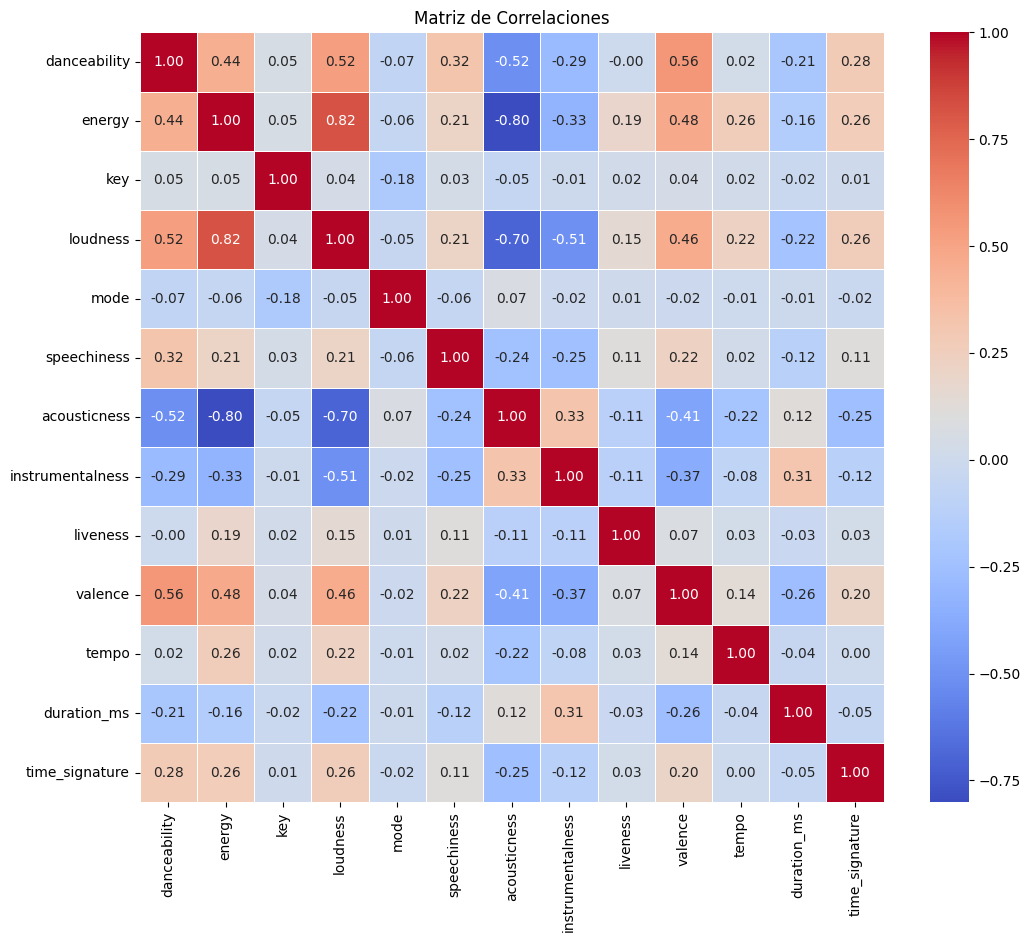

In [15]:
# Filtramos solo columnas de tipo int64 y float64
numeric_columns = df_spotify_final.select_dtypes(include=['int64', 'float64'])

# matriz de correlaciones
correlation_matrix = numeric_columns.corr()

#  mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlaciones")
plt.show()

Algunas de las correlaciones más relevantes que se observan en la matriz son:

Energía y Volumen: Una correlación positiva fuerte (0.82), indicando que a medida que la energía de una canción aumenta, también lo hace su volumen. Esto tiene sentido, ya que las canciones más energéticas suelen ser más ruidosas y dinámicas.

Acústica y Energía: Una correlación negativa fuerte (-0.80), lo que sugiere que las canciones más acústicas tienden a tener menos energía. Esto también es lógico, ya que las canciones acústicas suelen ser más suaves y tranquilas que las eléctricas o electrónicas.

Acústica y Volumen: También hay una correlación negativa significativa (-0.70) entre estos dos, indicando que las canciones más acústicas suelen ser más silenciosas. Esto se puede explicar por el hecho de que las canciones acústicas se graban con menos instrumentos y efectos que las que usan amplificación o sintetización.

Bailabilidad y Valencia: Una correlación positiva moderada (0.56), lo que indica que las canciones más bailables suelen tener una valencia más alta. La valencia es una medida de la positividad o negatividad que transmite una canción, por lo que se puede inferir que las canciones más bailables son más alegres o festivas.

Instrumentalidad y Acústica: Una correlación positiva moderada (0.33), lo que sugiere que las canciones más instrumentales suelen ser más acústicas. La instrumentalidad es una medida de la presencia de voces humanas en una canción, mientras que la acústica es una medida de la ausencia de sonidos eléctricos o sintetizados. Esto implica que las canciones más instrumentales se basan más en instrumentos naturales o tradicionales que en efectos o procesamientos digitales.

Tempo y Energía: Una correlación positiva débil (0.21), lo que significa que las canciones con un tempo más rápido suelen tener una energía más alta. El tempo es una medida de la velocidad o ritmo de una canción, expresado en pulsaciones por minuto (BPM), mientras que la energía es una medida de la intensidad o actividad de una canción. Esto se puede explicar por el hecho de que las canciones más rápidas suelen ser más dinámicas y estimulantes que las más lentas.

A continuación definimos en df_features las variables que vamos a utilizar para hacer nuestro train test.
Descartamos 'mode' y 'key' por su baja correlación con el resto de variables, y su posible inferencia negativa en nuestro proceso de clasificación de géneros musicales.

In [16]:
df_features = df_spotify_final.drop(['track_name', 'artist_name', 'album', 'mode', 'key'], axis=1)
df_features

danceability  energy  loudness  speechiness  acousticness  \
0             0.63    0.62    -10.95         0.04          0.49   
1             0.73    0.05    -22.56         0.04          0.91   
2             0.70    0.48    -12.21         0.05          0.15   
3             0.74    0.44     -9.62         0.04          0.60   
4             0.75    0.29    -14.44         0.05          0.66   
...            ...     ...       ...          ...           ...   
8977          0.78    0.64     -9.45         0.05          0.00   
8978          0.72    0.83     -9.15         0.11          0.01   
8979          0.72    0.65    -11.22         0.05          0.00   
8980          0.76    0.45    -10.23         0.07          0.03   
8981          0.68    0.57    -15.71         0.04          0.01   

      instrumentalness  liveness  valence  tempo  duration_ms  time_signature  \
0                 0.00      0.20     0.84 103.36       147800               4   
1                 0.05      0.12     0.42  78.03       338333               4   
2                 0.03      0.20     0.71 122.86       181786               4   
3                 0.02      0.61     0.77 114.22       188200               4   
4                 0.00      0.12     0.57 111.33       143332               4   
...                ...       ...      ...    ...          ...             ...   
8977              0.76      0.11     0.23 135.34       212160               4   
8978              0.94      0.12     0.42 133.99       317483               3   
8979              0.94      0.12     0.18 130.01       355586               4   
8980              0.86      0.11     0.69 148.00       236333               4   
8981              0.90      0.12     0.41 134.77       335063               4   

           genre  
0          blues  
1          blues  
2          blues  
3          blues  
4          blues  
...          ...  
8977  electronic  
8978  electronic  
8979  electronic  
8980  electronic  
8981  electronic  

[8982 rows x 12 columns]

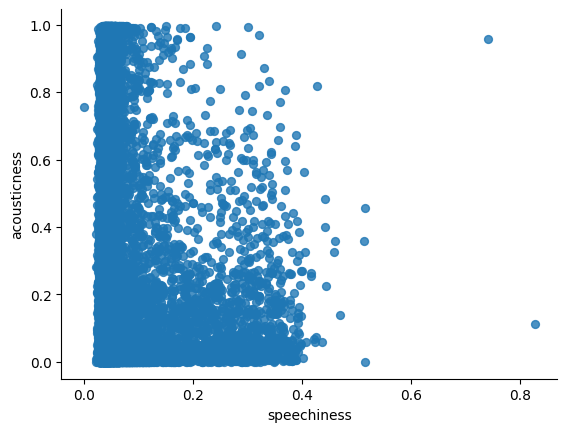

In [17]:
# @title speechiness vs acousticness

from matplotlib import pyplot as plt
df_features.plot(kind='scatter', x='speechiness', y='acousticness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

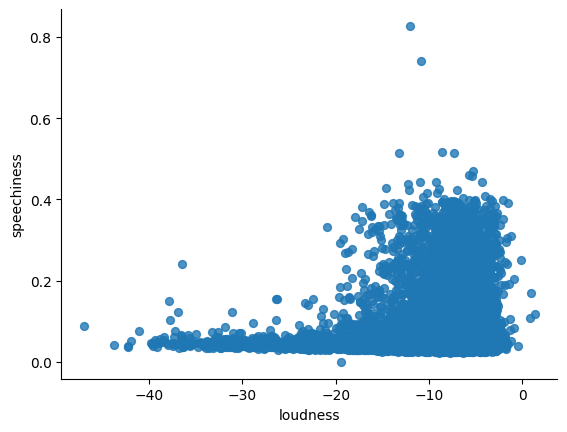

In [18]:
# @title loudness vs speechiness

from matplotlib import pyplot as plt
df_features.plot(kind='scatter', x='loudness', y='speechiness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

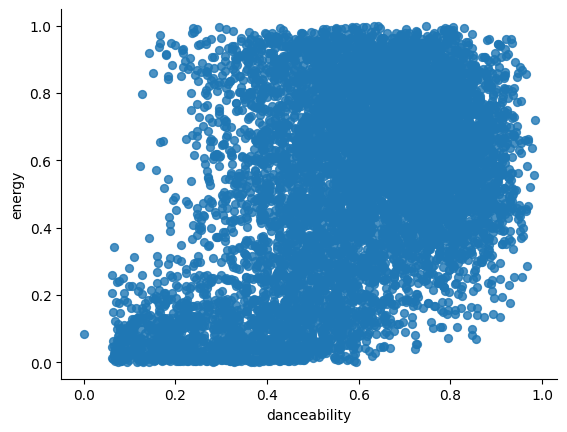

In [19]:
# @title danceability vs energy

from matplotlib import pyplot as plt
df_features.plot(kind='scatter', x='danceability', y='energy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

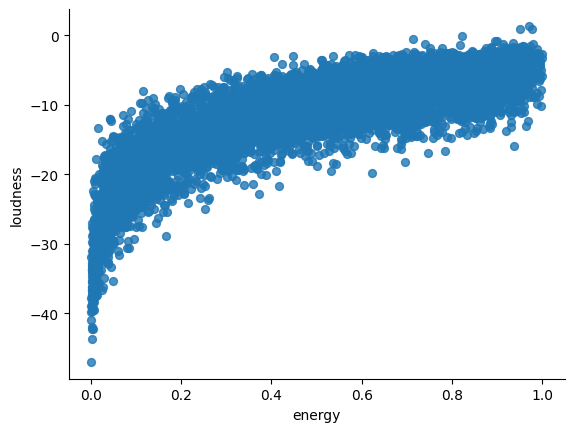

In [20]:
# @title energy vs loudness

from matplotlib import pyplot as plt
df_features.plot(kind='scatter', x='energy', y='loudness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

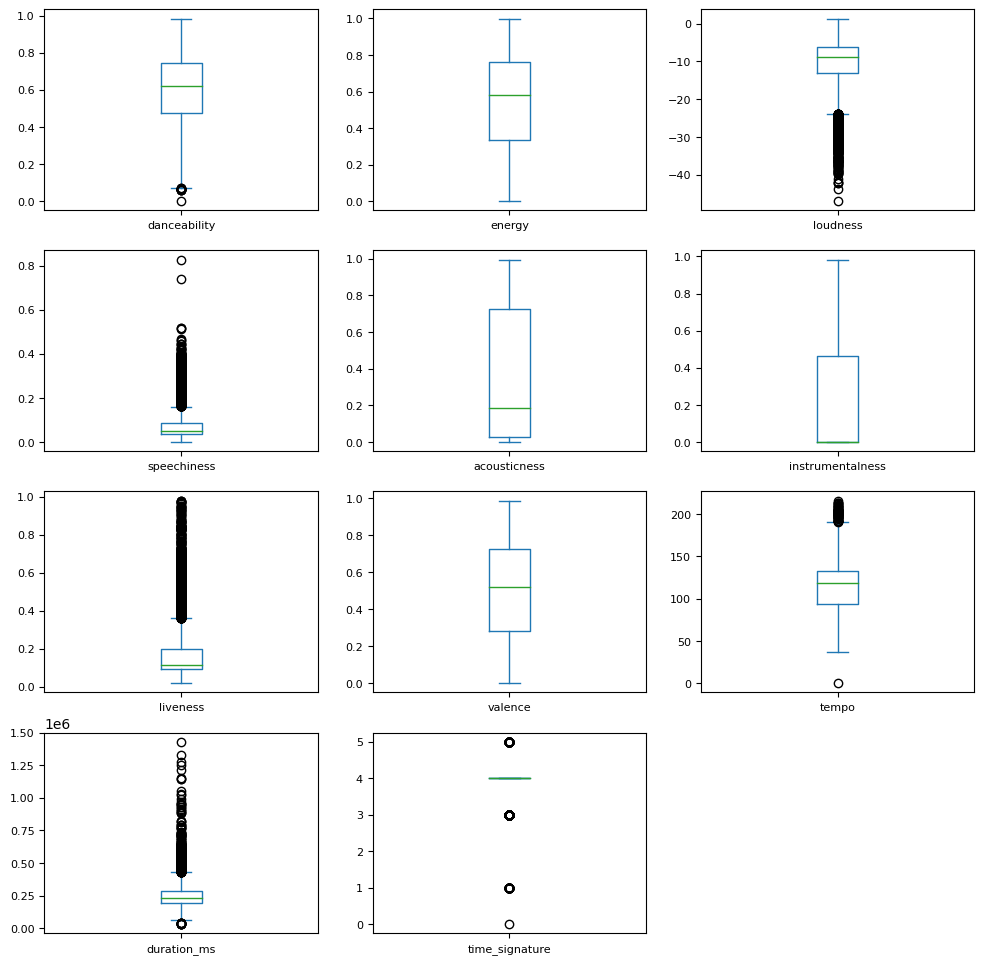

In [21]:
df_features.plot(kind='box',subplots=True, layout=(4,3), fontsize=8, figsize=(12,12));

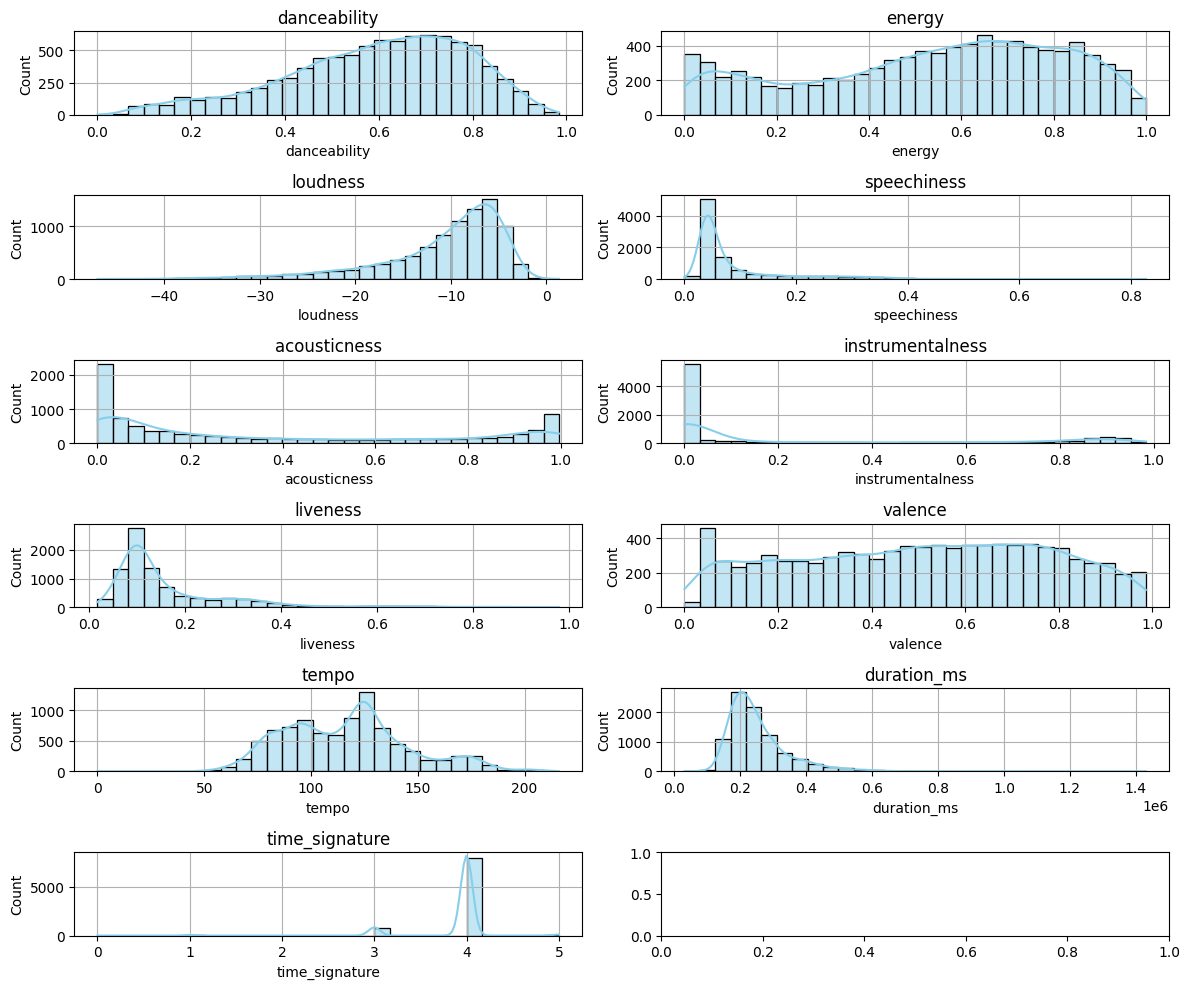

In [22]:
# Filtramos solo columnas de tipo int64 y float64
columnas_numericas = df_features.select_dtypes(include=['int64', 'float64'])

# Calculamos el número necesario de filas y columnas para los subgráficos
num_plots = len(columnas_numericas.columns)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Creamos histogramas y KDE para cada columna
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, columna in enumerate(columnas_numericas.columns):
    sns.histplot(df_features[columna], bins=30, kde=True, color='skyblue', edgecolor='black', ax=axs[i // num_cols, i % num_cols])
    axs[i // num_cols, i % num_cols].set_title(columna)
    axs[i // num_cols, i % num_cols].grid(True)

# Ajustamos el diseño
fig.tight_layout()
plt.show()



In [23]:
# TEST SHAPIRO

import pandas as pd
from scipy.stats import shapiro

columnas = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature']

 #Realizamos el test de Shapiro-Wilk para cada columna
for column in columnas:
    stat, p = shapiro(df_features[column])
    print(f'Columna: {column}, Estadística: {stat:.3f}, p-valor: {p:.3f}')

Columna: danceability, Estadística: 0.969, p-valor: 0.000
Columna: energy, Estadística: 0.950, p-valor: 0.000
Columna: loudness, Estadística: 0.861, p-valor: 0.000
Columna: speechiness, Estadística: 0.668, p-valor: 0.000
Columna: acousticness, Estadística: 0.818, p-valor: 0.000
Columna: instrumentalness, Estadística: 0.653, p-valor: 0.000
Columna: liveness, Estadística: 0.725, p-valor: 0.000
Columna: valence, Estadística: 0.963, p-valor: 0.000
Columna: tempo, Estadística: 0.980, p-valor: 0.000
Columna: duration_ms, Estadística: 0.807, p-valor: 0.000
Columna: time_signature, Estadística: 0.377, p-valor: 0.000


En los gráficos anteriores ya habíamos visualizado que ninguna de las variables sigue una distribución normal, además de la presencia de outliers en algunas de ellas. Tras realizar el test de Shapiro-Wilk, nos confirma que podemos rechazar la hipótesis nula de que las variables siguen una distribución normal o gaussiana, ya que el p-value es menor a 0.005. (Todas tienen un p-value de 0.000)

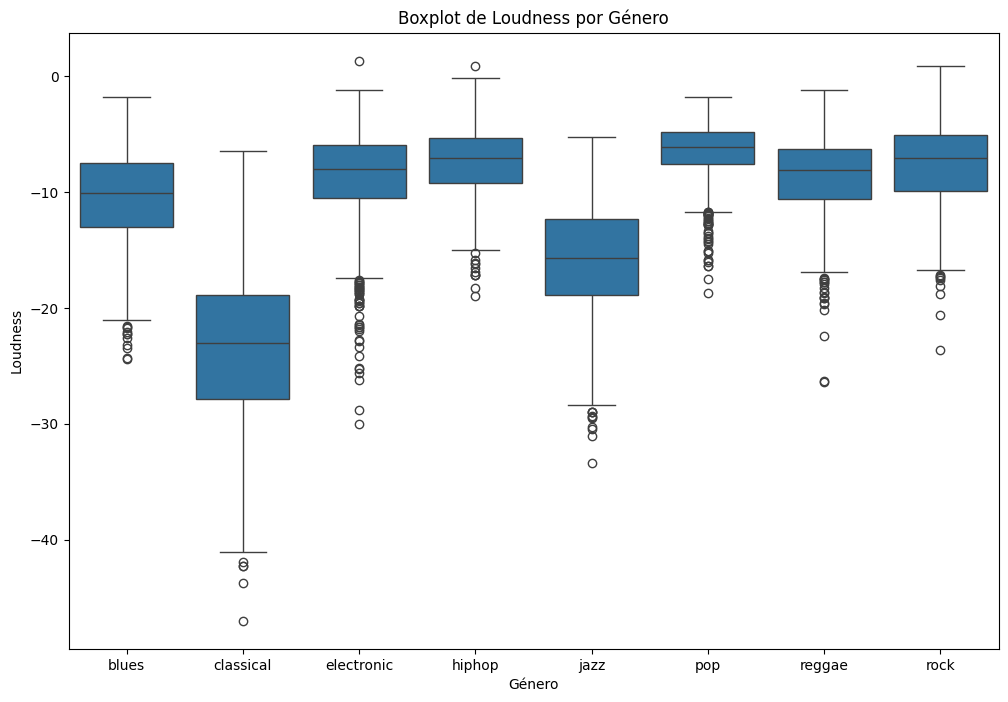

In [24]:
# gráfico de loudness por género
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='loudness', data=df_features)
plt.title('Boxplot de Loudness por Género')
plt.xlabel('Género')
plt.ylabel('Loudness')
plt.show()

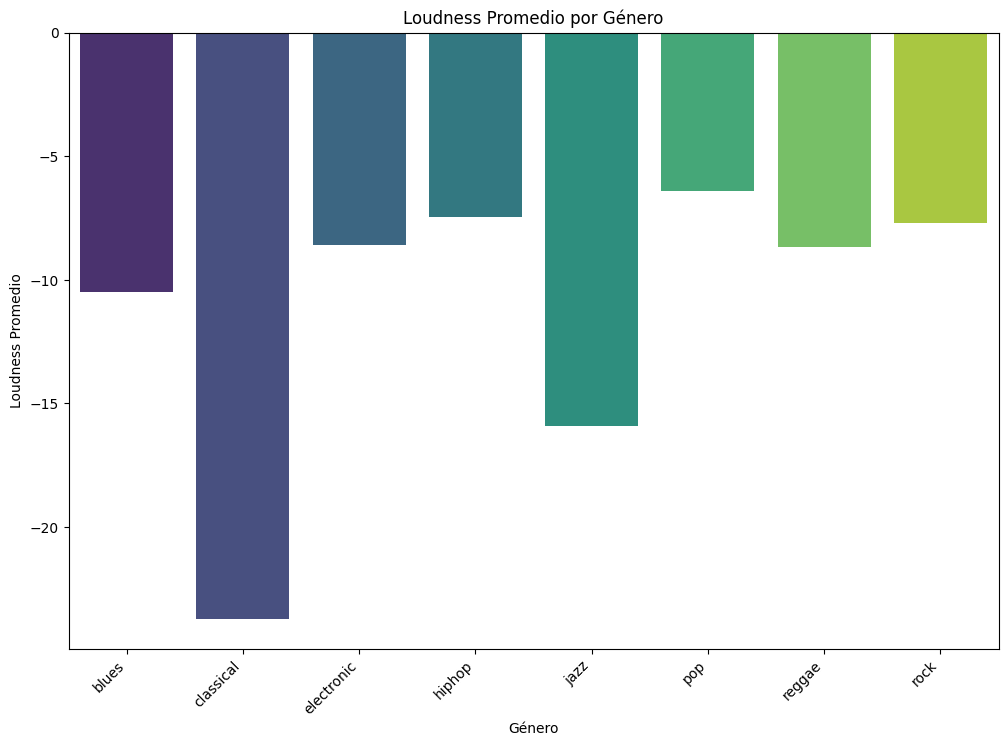

In [25]:
# gráfico de barras loudness por género
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='loudness', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Loudness Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Loudness Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

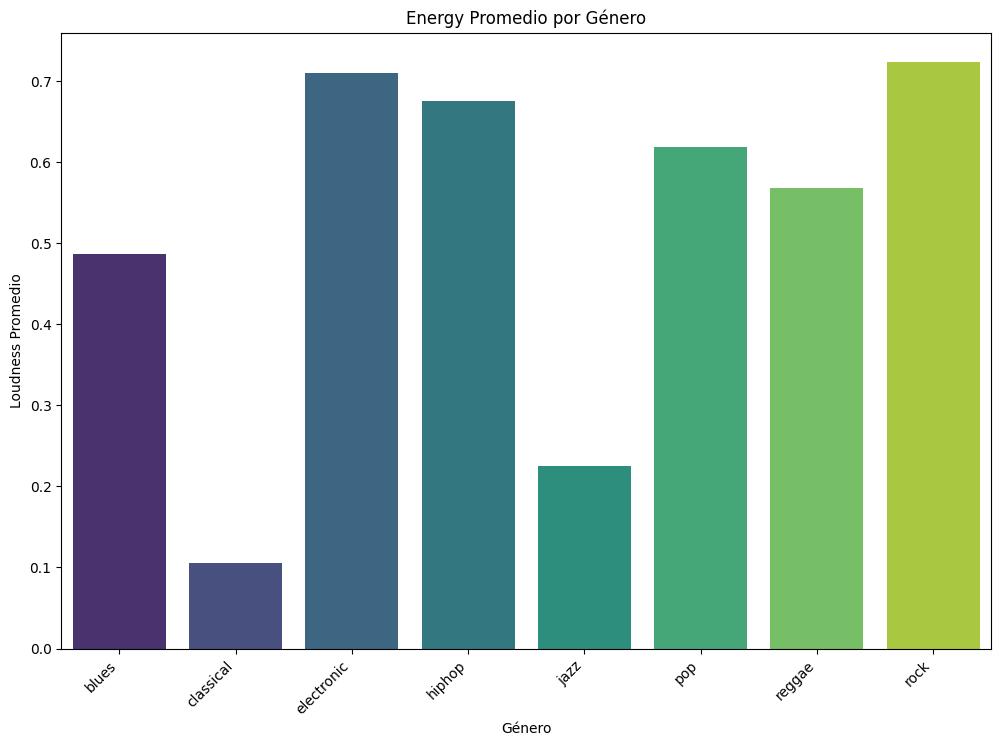

In [26]:
# gráfico de barras energy por género
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='energy', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Energy Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Loudness Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()


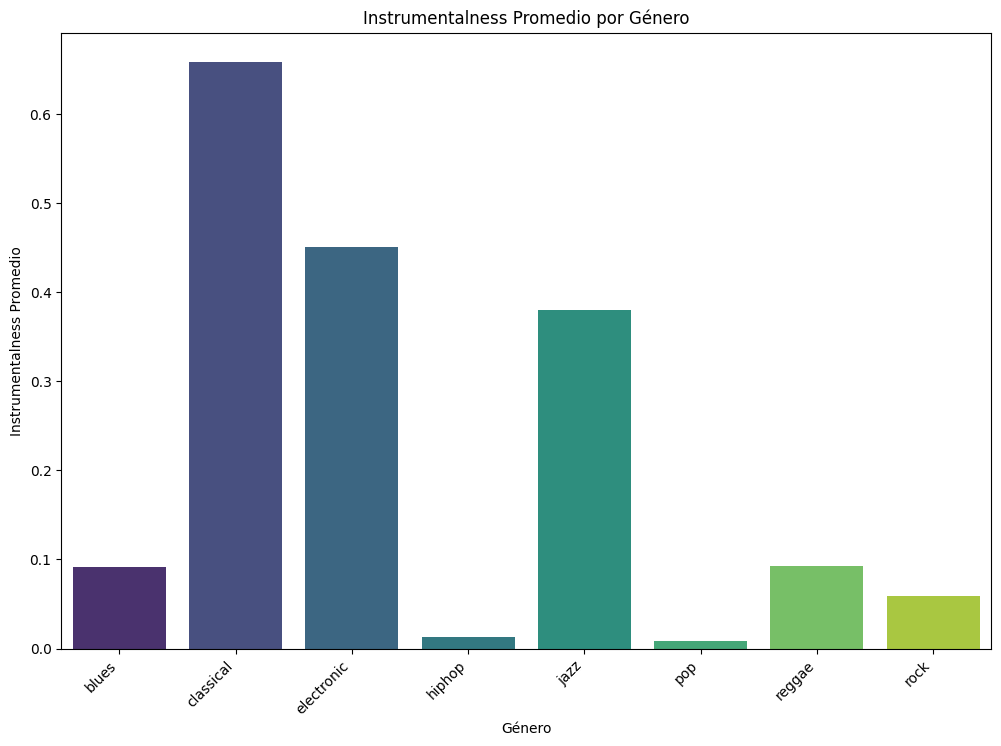

In [27]:
# gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='instrumentalness', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Instrumentalness Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Instrumentalness Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

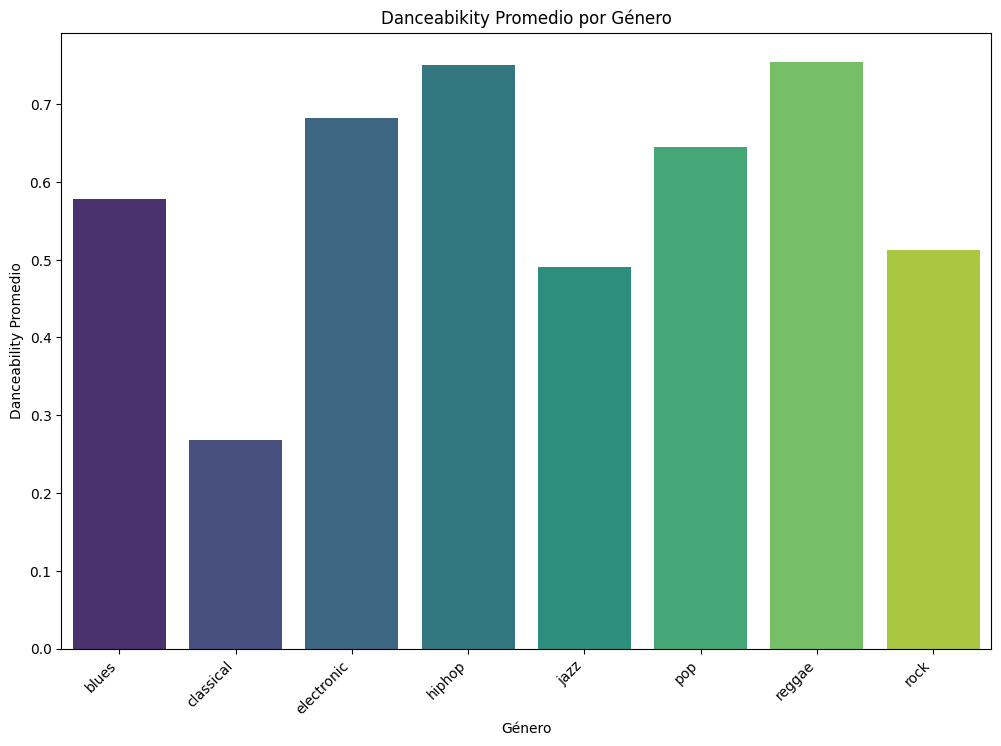

In [28]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='danceability', data=df_features, ci=None, estimator='mean', palette='viridis')
plt.title('Danceabikity Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Danceability Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

Una vez definido el dataframe que vamos a utilizar para entrenar, definimos 'X' e 'y' (target), y a su vez aplicaremos un label coder 'y'.
Después hacemos la división train test.

In [29]:
X = df_features.drop('genre', axis=1)
y = df_features['genre']

# Aplicamos LabelEncoder a la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Podemos visualizar, para nuestra propia información, a qué código pertenece cada género:

In [30]:
# Obtener los equivalentes originales y sus códigos
equivalentes_originales = le.classes_
codigos_asignados = le.transform(equivalentes_originales)

# Visualizamos los equivalentes originales y sus códigos
for codigo, equivalente_original in zip(codigos_asignados, equivalentes_originales):
    print(f"Código: {codigo}, Equivalente Original: {equivalente_original}")


Código: 0, Equivalente Original: blues
Código: 1, Equivalente Original: classical
Código: 2, Equivalente Original: electronic
Código: 3, Equivalente Original: hiphop
Código: 4, Equivalente Original: jazz
Código: 5, Equivalente Original: pop
Código: 6, Equivalente Original: reggae
Código: 7, Equivalente Original: rock


In [31]:
df_features.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'genre'],
      dtype='object')

Procedemos a realizar el escalado de las variables. Hemos visto que no siguen una distribución normal y algunas de ellas tienen outliers. En ese caso, pensaríamos en hacer un Robust Scaler para las variables con outliers, y un MinMax Scaler para las variables sin outliers. Pero en la práctica, esta diferencia de escalados no da los resultados esperados en la clasificación de géneros. Optamos en nuestro caso, a efectuar un Robust Scaler a todas las variables, independientemente de si tienen outliers o no. Más adelante veremos (al aplicar el mejor modelo al segundo dataset) que los resultados obtenidos son más que satisfactorios.

In [32]:
# Inicializar el RobustScaler
robust_scaler = RobustScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = robust_scaler.fit_transform(X_train)

# Solo transformar los datos de prueba (no volver a ajustar para evitar data leakage)
X_test_scaled = robust_scaler.transform(X_test)

Aplicamos Lazy Classifier para conocer la aplicación de qué modelo es el más adecuado. En nuestro caso vemos que Random Forest Classifier ofrece el mejor rendimiento, con un Accuracy y un F1 Score de 0.71.

In [33]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:37<00:01,  1.48s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2552
[LightGBM] [Info] Number of data points in the train set: 7185, number of used features: 11
[LightGBM] [Info] Start training from score -2.200152
[LightGBM] [Info] Start training from score -2.259678
[LightGBM] [Info] Start training from score -1.669671
[LightGBM] [Info] Start training from score -2.169228
[LightGBM] [Info] Start training from score -2.180250
[LightGBM] [Info] Start training from score -1.995264
[LightGBM] [Info] Start training from score -2.208984
[LightGBM] [Info] Start training from score -2.091906


100%|██████████| 29/29 [00:39<00:00,  1.37s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.71               0.70    None      0.71   
XGBClassifier                      0.70               0.69    None      0.69   
ExtraTreesClassifier               0.70               0.69    None      0.70   
LGBMClassifier                     0.69               0.69    None      0.69   
SVC                                0.68               0.68    None      0.68   
NuSVC                              0.66               0.65    None      0.66   
BaggingClassifier                  0.66               0.65    None      0.66   
QuadraticDiscriminantAnalysis      0.64               0.64    None      0.64   
LogisticRegression                 0.64               0.63    None      0.64   
KNeighborsClassifier               0.63               0.62    None      0.63   
LinearDiscriminantAnalysis         0.62               0.62    None      0.63   
CalibratedClassifierCV             0.63               0.61    None      0.62   
LinearSVC                          0.62               0.61    None      0.62   
NearestCentroid                    0.58               0.59    None      0.59   
LabelSpreading                     0.59               0.58    None      0.59   
LabelPropagation                   0.59               0.58    None      0.59   
GaussianNB                         0.58               0.58    None      0.58   
SGDClassifier                      0.58               0.57    None      0.58   
RidgeClassifier                    0.58               0.56    None      0.57   
RidgeClassifierCV                  0.58               0.56    None      0.56   
DecisionTreeClassifier             0.57               0.56    None      0.57   
BernoulliNB                        0.51               0.50    None      0.51   
ExtraTreeClassifier                0.50               0.49    None      0.50   
AdaBoostClassifier                 0.45               0.46    None      0.43   
Perceptron                         0.48               0.45    None      0.47   
PassiveAggressiveClassifier        0.40               0.40    None      0.38   
DummyClassifier                    0.20               0.12    None      0.07   

                               Time Taken  
Model                                      
RandomForestClassifier               2.43  
XGBClassifier                        4.55  
ExtraTreesClassifier                 1.32  
LGBMClassifier                       1.81  
SVC                                  2.07  
NuSVC                                4.39  
BaggingClassifier                    0.75  
QuadraticDiscriminantAnalysis        0.03  
LogisticRegression                   0.59  
KNeighborsClassifier                 0.28  
LinearDiscriminantAnalysis           0.07  
CalibratedClassifierCV               9.47  
LinearSVC                            2.84  
NearestCentroid                      0.05  
LabelSpreading                       4.96  
LabelPropagation                     2.40  
GaussianNB                           0.03  
SGDClassifier                        0.26  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.05  
DecisionTreeClassifier               0.16  
BernoulliNB                          0.04  
ExtraTreeClassifier                  0.05  
AdaBoostClassifier                   0.75  
Perceptron                           0.06  
PassiveAggressiveClassifier          0.06  
DummyClassifier                      0.03

Inicializamos el modelo Random Forest Classifier:

In [34]:
# clasificador de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [35]:
# Entrenamos el modelo
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)
# informe de clasificación
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       193
           1       0.90      0.85      0.87       200
           2       0.80      0.78      0.79       358
           3       0.71      0.78      0.75       198
           4       0.67      0.71      0.69       177
           5       0.64      0.68      0.66       239
           6       0.68      0.63      0.66       209
           7       0.64      0.65      0.64       223

    accuracy                           0.71      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.71      0.71      0.71      1797



Se confirman los resultados ya obtenidos con el Lazy Classifier. Obtenemos hiperparámetros:

In [37]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Ajustamos hiperparámetros:

In [38]:
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 50, num=5)] + [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]

}




Hacemos Randomized Search. Dada la complejidad del modelo y alto número de datos a procesar, la opción de GridSearch tiene un alto coste computacional, y optamos por tanto por Randomized Search, el cual ofrece resultados similares con un coste computacional no tan elevado.

In [39]:
random_search_rf = RandomizedSearchCV(rf_clf, param_dist_rf, n_iter=50, cv=5, verbose = 2, scoring='accuracy', n_jobs=-1)


In [40]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy', verbose=2)

Obtenemos los mejores hiperparámetros:

In [41]:
# mejores parámetros encontrados
best_params_rf = random_search_rf.best_params_
print("Mejores hiperparámetros encontrados:", best_params_rf)

Mejores hiperparámetros encontrados: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}


Obtenemos el mejor modelo. No hay una mejora. Los resultados siguen siendo los mismos. Confirma un Accuracy y F1 Score de 0.71

In [42]:
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)


print("Informe de clasificación:\n", classification_report(y_test, y_pred_rf))

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.59      0.58      0.58       193
           1       0.90      0.84      0.87       200
           2       0.79      0.78      0.78       358
           3       0.72      0.73      0.72       198
           4       0.67      0.70      0.69       177
           5       0.64      0.69      0.66       239
           6       0.66      0.62      0.64       209
           7       0.64      0.66      0.65       223

    accuracy                           0.71      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.71      0.71      0.71      1797



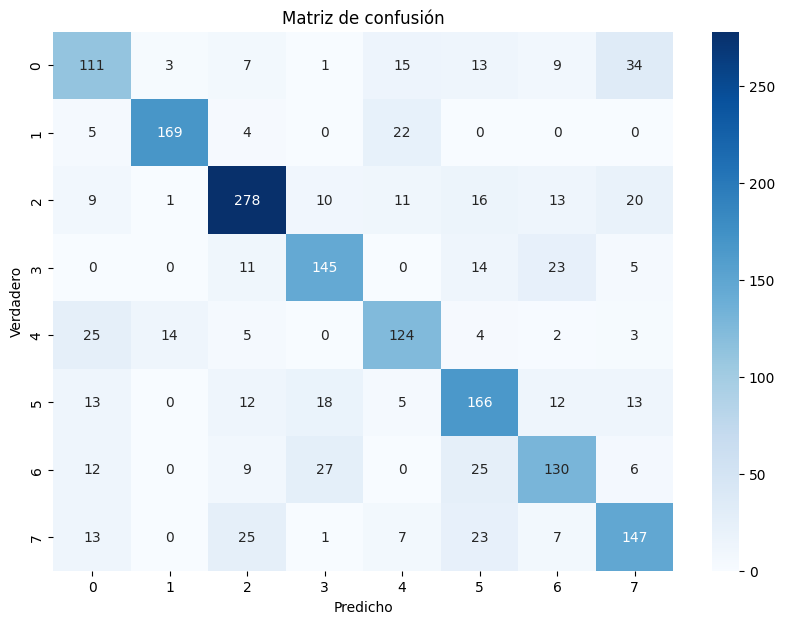

In [43]:
# matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizamos la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

Pasamos a realizar el cross validation de nuestro modelo. con una precisión de 0.701, valida nuestro modelo Random Forest.

In [44]:
# Realizamos validación cruzada
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_rf)
print("Precisión media:", cv_scores_rf.mean())
print("Desviación estándar de la precisión:", cv_scores_rf.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.69589422 0.68475992 0.71607516 0.71189979 0.6986778 ]
Precisión media: 0.7014613778705636
Desviación estándar de la precisión: 0.011315505427517265


PARTE II: Aplicamos las predicciones a un segundo dataset con más de 1 millón de canciones. Este dataset carece de géneros musicales, y ese es nuestro objetivo, aplicar el modelo obtenido a este nuevo dataset para que nos clasifique las canciones por género.

Cargamos este nuevo dataset (df_predictions):

In [45]:
df_predictions = pd.read_csv('tracks_features.csv')

df_predictions


id                   name  \
0        7lmeHLHBe4nmXzuXc0HDjk                Testify   
1        1wsRitfRRtWyEapl0q22o8        Guerrilla Radio   
2        1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb   
3        2lbASgTSoDO7MTuLAXlTW0              Mic Check   
4        1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire   
...                         ...                    ...   
1103177  66ROlzeyCUS2vuy3kWdydR              月影のスローダンス   
1103178  6qjS51mSjNkFvaGfK20MRi              今夜もハートエイク   
1103179  7kLe2EUS6HKfQqlL7xlN8q           Be Your No.1   
1103180  0MWhqDsiXY1GVYlYaAMNCq          It's A Party!   
1103181  1puTfbZYWcekikROk42pmj          One More Time   

                               album                album_id  \
0          The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
1          The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
2          The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
3          The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
4          The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
...                              ...                     ...   
1103177  NIGHT SONGS (2018リマスターVer.)  03OewEDDvmT2CxU3YA3yAL   
1103178  NIGHT SONGS (2018リマスターVer.)  03OewEDDvmT2CxU3YA3yAL   
1103179  NIGHT SONGS (2018リマスターVer.)  03OewEDDvmT2CxU3YA3yAL   
1103180  NIGHT SONGS (2018リマスターVer.)  03OewEDDvmT2CxU3YA3yAL   
1103181  NIGHT SONGS (2018リマスターVer.)          03OewEDDvmT2Cx   

                              artists                  artist_ids  \
0        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
1        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
2        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
3        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
4        ['Rage Against The Machine']  ['2d0hyoQ5ynDBnkvAbJKORj']   
...                               ...                         ...   
1103177            ['Stardust Revue']  ['6gwjJz85PWrQ4mSLrku8fh']   
1103178            ['Stardust Revue']  ['6gwjJz85PWrQ4mSLrku8fh']   
1103179            ['Stardust Revue']  ['6gwjJz85PWrQ4mSLrku8fh']   
1103180            ['Stardust Revue']  ['6gwjJz85PWrQ4mSLrku8fh']   
1103181                           NaN                         NaN   

         track_number  disc_number explicit  danceability  ...  speechiness  \
0                1.00         1.00    False          0.47  ...         0.07   
1                2.00         1.00     True          0.60  ...         0.19   
2                3.00         1.00    False          0.32  ...         0.48   
3                4.00         1.00     True          0.44  ...         0.24   
4                5.00         1.00    False          0.43  ...         0.07   
...               ...          ...      ...           ...  ...          ...   
1103177          4.00         1.00    False          0.80  ...         0.06   
1103178          5.00         1.00    False          0.66  ...         0.04   
1103179          6.00         1.00    False          0.57  ...         0.05   
1103180          7.00         1.00    False          0.54  ...         0.04   
1103181           NaN          NaN      NaN           NaN  ...          NaN   

         acousticness  instrumentalness  liveness  valence  tempo  \
0                0.03              0.00      0.36     0.50 117.91   
1                0.01              0.00      0.15     0.49 103.68   
2                0.02              0.00      0.12     0.37 149.75   
3                0.16              0.00      0.12     0.57  96.75   
4                0.00              0.10      0.08     0.54 127.06   
...               ...               ...       ...      ...    ...   
1103177          0.15              0.00      0.04     0.56 147.70   
1103178          0.15              0.00      0.10     0.76 109.72   
1103179          0.09              0.00      0.21     0.54 103.82   
1103180          0.14              0.00      0.05     0.90 179.61   
1103181           NaN     

Visualizamos los tipos de variables:

In [46]:
df_predictions.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number        float64
disc_number         float64
explicit             object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
year                float64
release_date         object
dtype: object

Convertimos year a integer (int64):

In [ ]:
df_predictions['year'] = df_predictions['year'].astype('int64')

Eliminamos las columnas que no necesitamos. El dataset pasa a llamarse df_predictions_cleaned:

In [47]:
df_predictions_cleaned = df_predictions.drop(['id', 'album_id', 'artist_ids',
                'track_number','disc_number','explicit','release_date'], axis=1)




In [48]:
df_predictions_cleaned.describe()

danceability     energy        key   loudness       mode  speechiness  \
count    1103181.00 1103181.00 1103181.00 1103181.00 1103181.00   1103181.00   
mean           0.49       0.51       5.20     -11.89       0.67         0.08   
std            0.19       0.30       3.53       7.04       0.47         0.11   
min            0.00       0.00       0.00     -60.00       0.00         0.00   
25%            0.35       0.25       2.00     -15.43       0.00         0.04   
50%            0.50       0.52       5.00      -9.85       1.00         0.04   
75%            0.63       0.77       8.00      -6.73       1.00         0.07   
max            1.00       1.00      11.00       7.23       1.00         0.97   

       acousticness  instrumentalness   liveness    valence      tempo  \
count    1103181.00        1103181.00 1103181.00 1103181.00 1103181.00   
mean           0.45              0.29       0.20       0.43     117.55   
std            0.39              0.38       0.18       0.27      30.94   
min            0.00              0.00       0.00       0.00       0.00   
25%            0.04              0.00       0.10       0.19      94.03   
50%            0.40              0.01       0.12       0.40     116.54   
75%            0.87              0.73       0.24       0.65     136.97   
max            1.00              1.00       1.00       1.00     248.93   

       duration_ms  time_signature       year  
count   1103181.00      1103181.00 1103181.00  
mean     249794.98            3.83    2006.99  
std      162745.18            0.56      12.08  
min        1000.00            0.00       0.00  
25%      174568.00            4.00    2002.00  
50%      225280.00            4.00    2008.00  
75%      287253.00            4.00    2015.00  
max     6061090.00            5.00    2020.00

Comprobamos si hay valores nulos:

In [49]:
df_predictions_cleaned.isnull().sum()

name                0
album               0
artists             1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
year                1
dtype: int64

In [50]:
filas_con_nulos = df_predictions_cleaned.isnull().any(axis=1)


print("Filas con al menos un valor nulo:")
df_predictions_cleaned[filas_con_nulos]

Filas con al menos un valor nulo:


name                        album artists  danceability  \
1103181  One More Time  NIGHT SONGS (2018リマスターVer.)     NaN           NaN   

         energy  key  loudness  mode  speechiness  acousticness  \
1103181     NaN  NaN       NaN   NaN          NaN           NaN   

         instrumentalness  liveness  valence  tempo  duration_ms  \
1103181               NaN       NaN      NaN    NaN          NaN   

         time_signature  year  
1103181             NaN   NaN

Eliminamos los valores nulos y renombramos el dataset a df_predictions_final:

In [51]:
df_predictions_final = df_predictions_cleaned.dropna()

df_predictions_final

name                        album  \
0                      Testify    The Battle Of Los Angeles   
1              Guerrilla Radio    The Battle Of Los Angeles   
2             Calm Like a Bomb    The Battle Of Los Angeles   
3                    Mic Check    The Battle Of Los Angeles   
4        Sleep Now In the Fire    The Battle Of Los Angeles   
...                        ...                          ...   
1103176                  狙われた夜  NIGHT SONGS (2018リマスターVer.)   
1103177              月影のスローダンス  NIGHT SONGS (2018リマスターVer.)   
1103178              今夜もハートエイク  NIGHT SONGS (2018リマスターVer.)   
1103179           Be Your No.1  NIGHT SONGS (2018リマスターVer.)   
1103180          It's A Party!  NIGHT SONGS (2018リマスターVer.)   

                              artists  danceability  energy   key  loudness  \
0        ['Rage Against The Machine']          0.47    0.98  7.00     -5.40   
1        ['Rage Against The Machine']          0.60    0.96 11.00     -5.76   
2        ['Rage Against The Machine']          0.32    0.97  7.00     -5.42   
3        ['Rage Against The Machine']          0.44    0.97 11.00     -5.83   
4        ['Rage Against The Machine']          0.43    0.93  2.00     -6.73   
...                               ...           ...     ...   ...       ...   
1103176            ['Stardust Revue']          0.77    0.76  9.00     -4.50   
1103177            ['Stardust Revue']          0.80    0.47  7.00     -5.60   
1103178            ['Stardust Revue']          0.66    0.76  0.00     -4.68   
1103179            ['Stardust Revue']          0.57    0.89  2.00     -3.68   
1103180            ['Stardust Revue']          0.54    0.88  4.00     -3.43   

         mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0        1.00         0.07          0.03              0.00      0.36     0.50   
1        1.00         0.19          0.01              0.00      0.15     0.49   
2        1.00         0.48          0.02              0.00      0.12     0.37   
3        0.00         0.24          0.16              0.00      0.12     0.57   
4        1.00         0.07          0.00              0.10      0.08     0.54   
...       ...          ...           ...               ...       ...      ...   
1103176  0.00         0.04          0.01              0.00      0.05     0.90   
1103177  1.00         0.06          0.15              0.00      0.04     0.56   
1103178  0.00         0.04          0.15              0.00      0.10     0.76   
1103179  0.00         0.05          0.09              0.00      0.21     0.54   
1103180  1.00         0.04          0.14              0.00      0.05     0.90   

         tempo  duration_ms  time_signature    year  
0       117.91    210133.00            4.00 1999.00  
1       103.68    206200.00            4.00 1999.00  
2       149.75    298893.00            4.00 1999.00  
3        96.75    213640.00            4.00 1999.00  
4       127.06    205600.00            4.00 1999.00  
...        ...          ...             ...     ...  
1103176 110.77    285160.00            4.00 1987.00  
1103177 147.70    196440.00            4.00 1987.00  
1103178 109.72    278293.00            4.00 1987.00  
1103179 103.82    274933.00            4.00 1987.00  
1103180 179.61    201173.00            4.00 1987.00  

[1103181 rows x 17 columns]

In [52]:
df_predictions_final.reset_index(drop=True, inplace=True)

df_predictions_final

name                        album  \
0                      Testify    The Battle Of Los Angeles   
1              Guerrilla Radio    The Battle Of Los Angeles   
2             Calm Like a Bomb    The Battle Of Los Angeles   
3                    Mic Check    The Battle Of Los Angeles   
4        Sleep Now In the Fire    The Battle Of Los Angeles   
...                        ...                          ...   
1103176                  狙われた夜  NIGHT SONGS (2018リマスターVer.)   
1103177              月影のスローダンス  NIGHT SONGS (2018リマスターVer.)   
1103178              今夜もハートエイク  NIGHT SONGS (2018リマスターVer.)   
1103179           Be Your No.1  NIGHT SONGS (2018リマスターVer.)   
1103180          It's A Party!  NIGHT SONGS (2018リマスターVer.)   

                              artists  danceability  energy   key  loudness  \
0        ['Rage Against The Machine']          0.47    0.98  7.00     -5.40   
1        ['Rage Against The Machine']          0.60    0.96 11.00     -5.76   
2        ['Rage Against The Machine']          0.32    0.97  7.00     -5.42   
3        ['Rage Against The Machine']          0.44    0.97 11.00     -5.83   
4        ['Rage Against The Machine']          0.43    0.93  2.00     -6.73   
...                               ...           ...     ...   ...       ...   
1103176            ['Stardust Revue']          0.77    0.76  9.00     -4.50   
1103177            ['Stardust Revue']          0.80    0.47  7.00     -5.60   
1103178            ['Stardust Revue']          0.66    0.76  0.00     -4.68   
1103179            ['Stardust Revue']          0.57    0.89  2.00     -3.68   
1103180            ['Stardust Revue']          0.54    0.88  4.00     -3.43   

         mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0        1.00         0.07          0.03              0.00      0.36     0.50   
1        1.00         0.19          0.01              0.00      0.15     0.49   
2        1.00         0.48          0.02              0.00      0.12     0.37   
3        0.00         0.24          0.16              0.00      0.12     0.57   
4        1.00         0.07          0.00              0.10      0.08     0.54   
...       ...          ...           ...               ...       ...      ...   
1103176  0.00         0.04          0.01              0.00      0.05     0.90   
1103177  1.00         0.06          0.15              0.00      0.04     0.56   
1103178  0.00         0.04          0.15              0.00      0.10     0.76   
1103179  0.00         0.05          0.09              0.00      0.21     0.54   
1103180  1.00         0.04          0.14              0.00      0.05     0.90   

         tempo  duration_ms  time_signature    year  
0       117.91    210133.00            4.00 1999.00  
1       103.68    206200.00            4.00 1999.00  
2       149.75    298893.00            4.00 1999.00  
3        96.75    213640.00            4.00 1999.00  
4       127.06    205600.00            4.00 1999.00  
...        ...          ...             ...     ...  
1103176 110.77    285160.00            4.00 1987.00  
1103177 147.70    196440.00            4.00 1987.00  
1103178 109.72    278293.00            4.00 1987.00  
1103179 103.82    274933.00            4.00 1987.00  
1103180 179.61    201173.00            4.00 1987.00  

[1103181 rows x 17 columns]

Eliminamos los corchetes y las comillas de los strings de la columna 'artists'

In [54]:
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("[", "")
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("]", "")
df_predictions_final['artists'] = df_predictions_final['artists'].str.replace("'", "")

print(df_predictions_final['artists'])

0          Rage Against The Machine
1          Rage Against The Machine
2          Rage Against The Machine
3          Rage Against The Machine
4          Rage Against The Machine
                     ...           
1103176              Stardust Revue
1103177              Stardust Revue
1103178              Stardust Revue
1103179              Stardust Revue
1103180              Stardust Revue
Name: artists, Length: 1103181, dtype: object


In [55]:
df_predictions_final.columns

Index(['name', 'album', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'year'],
      dtype='object')

Seleccionamos en un dataframe a parte (df_features_2), las mismas variables que hemos empleado en el entrenamiento del modelo Random Forest. Para ello haremos un drop de las que no necesitamos:

In [56]:
df_features_2 = df_predictions_final.drop([ 'name', 'album','artists','year','mode','key'], axis=1)

In [57]:
df_features_2

danceability  energy  loudness  speechiness  acousticness  \
0                0.47    0.98     -5.40         0.07          0.03   
1                0.60    0.96     -5.76         0.19          0.01   
2                0.32    0.97     -5.42         0.48          0.02   
3                0.44    0.97     -5.83         0.24          0.16   
4                0.43    0.93     -6.73         0.07          0.00   
...               ...     ...       ...          ...           ...   
1103176          0.77    0.76     -4.50         0.04          0.01   
1103177          0.80    0.47     -5.60         0.06          0.15   
1103178          0.66    0.76     -4.68         0.04          0.15   
1103179          0.57    0.89     -3.68         0.05          0.09   
1103180          0.54    0.88     -3.43         0.04          0.14   

         instrumentalness  liveness  valence  tempo  duration_ms  \
0                    0.00      0.36     0.50 117.91    210133.00   
1                    0.00      0.15     0.49 103.68    206200.00   
2                    0.00      0.12     0.37 149.75    298893.00   
3                    0.00      0.12     0.57  96.75    213640.00   
4                    0.10      0.08     0.54 127.06    205600.00   
...                   ...       ...      ...    ...          ...   
1103176              0.00      0.05     0.90 110.77    285160.00   
1103177              0.00      0.04     0.56 147.70    196440.00   
1103178              0.00      0.10     0.76 109.72    278293.00   
1103179              0.00      0.21     0.54 103.82    274933.00   
1103180              0.00      0.05     0.90 179.61    201173.00   

         time_signature  
0                  4.00  
1                  4.00  
2                  4.00  
3                  4.00  
4                  4.00  
...                 ...  
1103176            4.00  
1103177            4.00  
1103178            4.00  
1103179            4.00  
1103180            4.00  

[1103181 rows x 11 columns]

Visualizamos las variables con boxplot.

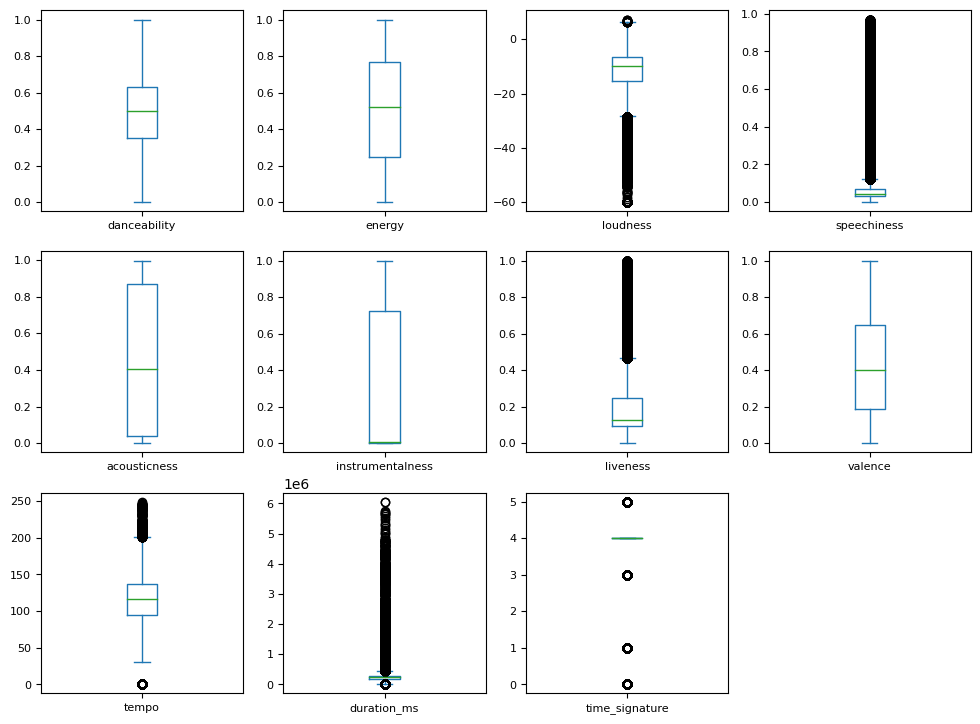

In [58]:
df_features_2.plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

Aplicaremos Robust Scaler a todo el dataframe (df_features_2). El escalado debe ser el mismo, en caso contrario los resultados de aplicar el modelo se distorsionarían.

In [59]:
# Inicializar el RobustScaler
robust_scaler = RobustScaler()

# Ajustar y transformar todos los datos
df_features_2_scaled = robust_scaler.fit_transform(df_features_2)

# Crear un nuevo DataFrame con los datos escalados
df_features_2_scaled = pd.DataFrame(df_features_2_scaled, columns=df_features_2.columns)

# Mostrar el DataFrame escalado
df_features_2_scaled

danceability  energy  loudness  speechiness  acousticness  \
0               -0.10    0.88      0.51         0.79         -0.45   
1                0.36    0.84      0.47         4.02         -0.47   
2               -0.66    0.87      0.51        12.29         -0.46   
3               -0.21    0.86      0.46         5.39         -0.29   
4               -0.26    0.79      0.36         0.72         -0.48   
...               ...     ...       ...          ...           ...   
1103176          0.97    0.47      0.61        -0.12         -0.47   
1103177          1.10   -0.10      0.49         0.56         -0.31   
1103178          0.57    0.46      0.59        -0.17         -0.30   
1103179          0.26    0.71      0.71         0.08         -0.38   
1103180          0.15    0.69      0.74        -0.23         -0.31   

         instrumentalness  liveness  valence  tempo  duration_ms  \
0                   -0.01      1.56     0.22   0.03        -0.13   
1                   -0.01      0.20     0.19  -0.30        -0.17   
2                   -0.01     -0.02    -0.07   0.77         0.65   
3                   -0.01     -0.03     0.38  -0.46        -0.10   
4                    0.13     -0.31     0.30   0.24        -0.17   
...                   ...       ...      ...    ...          ...   
1103176             -0.01     -0.48     1.09  -0.13         0.53   
1103177             -0.01     -0.57     0.33   0.73        -0.26   
1103178             -0.01     -0.16     0.77  -0.16         0.47   
1103179             -0.01      0.59     0.31  -0.30         0.44   
1103180             -0.01     -0.48     1.10   1.47        -0.21   

         time_signature  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00  
...                 ...  
1103176            0.00  
1103177            0.00  
1103178            0.00  
1103179            0.00  
1103180            0.00  

[1103181 rows x 11 columns]

Ahora aplicamos nuestro mejor modelo obtenido con Random Forest al conjunto de datos:

In [60]:
# Realizamos predicciones en este segundo conjunto de datos
predicted_genres = best_model_rf.predict(df_features_2)

In [61]:
predicted_genres

array([7, 7, 7, ..., 7, 5, 5])

Una vez obtebido el array con los géneros predichos (predicted_genres), los adjuntamos en una nueva columna en nuestro dataframe 'df_predictions_final'. Podemos ver la asignación de género a cada una de las canciones:

In [62]:
df_predictions_final['predicted_genre'] = predicted_genres

In [63]:
df_predictions_final

name                        album  \
0                      Testify    The Battle Of Los Angeles   
1              Guerrilla Radio    The Battle Of Los Angeles   
2             Calm Like a Bomb    The Battle Of Los Angeles   
3                    Mic Check    The Battle Of Los Angeles   
4        Sleep Now In the Fire    The Battle Of Los Angeles   
...                        ...                          ...   
1103176                  狙われた夜  NIGHT SONGS (2018リマスターVer.)   
1103177              月影のスローダンス  NIGHT SONGS (2018リマスターVer.)   
1103178              今夜もハートエイク  NIGHT SONGS (2018リマスターVer.)   
1103179           Be Your No.1  NIGHT SONGS (2018リマスターVer.)   
1103180          It's A Party!  NIGHT SONGS (2018リマスターVer.)   

                          artists  danceability  energy   key  loudness  mode  \
0        Rage Against The Machine          0.47    0.98  7.00     -5.40  1.00   
1        Rage Against The Machine          0.60    0.96 11.00     -5.76  1.00   
2        Rage Against The Machine          0.32    0.97  7.00     -5.42  1.00   
3        Rage Against The Machine          0.44    0.97 11.00     -5.83  0.00   
4        Rage Against The Machine          0.43    0.93  2.00     -6.73  1.00   
...                           ...           ...     ...   ...       ...   ...   
1103176            Stardust Revue          0.77    0.76  9.00     -4.50  0.00   
1103177            Stardust Revue          0.80    0.47  7.00     -5.60  1.00   
1103178            Stardust Revue          0.66    0.76  0.00     -4.68  0.00   
1103179            Stardust Revue          0.57    0.89  2.00     -3.68  0.00   
1103180            Stardust Revue          0.54    0.88  4.00     -3.43  1.00   

         speechiness  acousticness  instrumentalness  liveness  valence  \
0               0.07          0.03              0.00      0.36     0.50   
1               0.19          0.01              0.00      0.15     0.49   
2               0.48          0.02              0.00      0.12     0.37   
3               0.24          0.16              0.00      0.12     0.57   
4               0.07          0.00              0.10      0.08     0.54   
...              ...           ...               ...       ...      ...   
1103176         0.04          0.01              0.00      0.05     0.90   
1103177         0.06          0.15              0.00      0.04     0.56   
1103178         0.04          0.15              0.00      0.10     0.76   
1103179         0.05          0.09              0.00      0.21     0.54   
1103180         0.04          0.14              0.00      0.05     0.90   

         tempo  duration_ms  time_signature  year  predicted_genre  
0       117.91    210133.00            4.00  1999                7  
1       103.68    206200.00            4.00  1999                7  
2       149.75    298893.00            4.00  1999                7  
3        96.75    213640.00            4.00  1999                3  
4       127.06    205600.00            4.00  1999                7  
...        ...          ...             ...   ...              ...  
1103176 110.77    285160.00            4.00  1987                5  
1103177 147.70    196440.00            4.00  1987                5  
1103178 109.72    278293.00            4.00  1987                7  
1103179 103.82    274933.00            4.00  1987                5  
1103180 179.61    201173.00            4.00  1987                5  

[1103181 rows x 18 columns]

In [64]:
df_predictions_final.columns

Index(['name', 'album', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'year',
       'predicted_genre'],
      dtype='object')

Finalmente, crearemos un último dataframe ('df_final_genre_predictions') sólo con las columnas de nuestro interés:

Nombre de la canción, nombre del álbum, nombre del artista, año del disco y género predicho:

In [65]:
df_final_genre_predictions = df_predictions_final.drop(['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature' ], axis=1)

df_final_genre_predictions

name                        album  \
0                      Testify    The Battle Of Los Angeles   
1              Guerrilla Radio    The Battle Of Los Angeles   
2             Calm Like a Bomb    The Battle Of Los Angeles   
3                    Mic Check    The Battle Of Los Angeles   
4        Sleep Now In the Fire    The Battle Of Los Angeles   
...                        ...                          ...   
1103176                  狙われた夜  NIGHT SONGS (2018リマスターVer.)   
1103177              月影のスローダンス  NIGHT SONGS (2018リマスターVer.)   
1103178              今夜もハートエイク  NIGHT SONGS (2018リマスターVer.)   
1103179           Be Your No.1  NIGHT SONGS (2018リマスターVer.)   
1103180          It's A Party!  NIGHT SONGS (2018リマスターVer.)   

                          artists  year  predicted_genre  
0        Rage Against The Machine  1999                7  
1        Rage Against The Machine  1999                7  
2        Rage Against The Machine  1999                7  
3        Rage Against The Machine  1999                3  
4        Rage Against The Machine  1999                7  
...                           ...   ...              ...  
1103176            Stardust Revue  1987                5  
1103177            Stardust Revue  1987                5  
1103178            Stardust Revue  1987                7  
1103179            Stardust Revue  1987                5  
1103180            Stardust Revue  1987                5  

[1103181 rows x 5 columns]

Sustituimos las etiquetas numéricas de género por sus nombre reales, y podemos dar ya por conseguido nuestro objetivo:

In [66]:
#mapeo de géneros
genre_mapping = dict(zip(codigos_asignados, equivalentes_originales))

# reemplazamos los códigos en el DataFrame
df_final_genre_predictions['predicted_genre'] = df_final_genre_predictions['predicted_genre'].map(genre_mapping)

df_final_genre_predictions

name                        album  \
0                      Testify    The Battle Of Los Angeles   
1              Guerrilla Radio    The Battle Of Los Angeles   
2             Calm Like a Bomb    The Battle Of Los Angeles   
3                    Mic Check    The Battle Of Los Angeles   
4        Sleep Now In the Fire    The Battle Of Los Angeles   
...                        ...                          ...   
1103176                  狙われた夜  NIGHT SONGS (2018リマスターVer.)   
1103177              月影のスローダンス  NIGHT SONGS (2018リマスターVer.)   
1103178              今夜もハートエイク  NIGHT SONGS (2018リマスターVer.)   
1103179           Be Your No.1  NIGHT SONGS (2018リマスターVer.)   
1103180          It's A Party!  NIGHT SONGS (2018リマスターVer.)   

                          artists  year predicted_genre  
0        Rage Against The Machine  1999            rock  
1        Rage Against The Machine  1999            rock  
2        Rage Against The Machine  1999            rock  
3        Rage Against The Machine  1999          hiphop  
4        Rage Against The Machine  1999            rock  
...                           ...   ...             ...  
1103176            Stardust Revue  1987             pop  
1103177            Stardust Revue  1987             pop  
1103178            Stardust Revue  1987            rock  
1103179            Stardust Revue  1987             pop  
1103180            Stardust Revue  1987             pop  

[1103181 rows x 5 columns]

Adicionalmente, podemos crear dataframes por cada uno de los 8 géneros musicales:

In [67]:
df_pop = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'pop']

df_pop.head()

name           album                  artists  year  \
23   Do It for Love  Do It for Love  Daryl Hall & John Oates  2018   
25  Forever for You  Do It for Love  Daryl Hall & John Oates  2018   
27      Getaway Car  Do It for Love  Daryl Hall & John Oates  2018   
28    Make You Stay  Do It for Love  Daryl Hall & John Oates  2018   
29          Miss DJ  Do It for Love  Daryl Hall & John Oates  2018   

   predicted_genre  
23             pop  
25             pop  
27             pop  
28             pop  
29             pop

In [107]:
df_pop_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'pop'].sample(n=10)
df_pop_sample

name                               album  \
685014      Feeding the Rich (Acoustic)                      Good Americans   
798687   Hoy Te Toca Dormir En El Suelo  Lo Mejor De Lo Mejor De RCA Victor   
298704                              Why               High, Wide & Handsome   
414135                           Undone                             Ruut EP   
868126                     STILLKILL187                           BROKESTAR   
507413                          Be Bold                             Be Bold   
484511                     Girlz & Boyz                                Edge   
112478          Sentimiento Desconocido                La Evolucion Musical   
1017680          Hello - Wild Dee Remix              Hello (Wild Dee Remix)   
388178          Not You Too (Interlude)          The Come Up Vol.3 (Signed)   

                 artists  year predicted_genre  
685014         KillRadio  2008             pop  
798687   Yolanda Del Rio  2001             pop  
298704       The Trishas  2012             pop  
414135              Ruut  2007             pop  
868126       Murda Killa  2018             pop  
507413     Margaret-Rose  2015             pop  
484511         Slowearth  2003             pop  
112478           El Joey  2010             pop  
1017680         THE ROOP  2017             pop  
388178         Toosmooth  2013             pop

In [90]:
df_classical= df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'classical']

df_classical.head()

name                        album         artists  year  \
53       Train In The Rain            Dart To The Heart  Bruce Cockburn  1994   
408                 Marvel                   Martin Rev      Martin Rev  2002   
409                 5 To 5                   Martin Rev      Martin Rev  2002   
417  All Through The Night  Holiday Songs And Lullabies    Shawn Colvin  1998   
425        Close Your Eyes  Holiday Songs And Lullabies    Shawn Colvin  1998   

    predicted_genre  
53        classical  
408       classical  
409       classical  
417       classical  
425       classical

In [91]:
df_classical_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'classical'].sample(n=10)
df_classical_sample


name  \
474412   Six Piano Études (First Recording) (1995 - 2003)   
579229  Sonata In D Major For Harpsichord Or Fortepian...   
663976              La mer: Dialogue du vent et de la mer   
644959  Piano Sonata No. 4 in F-Sharp Major, Op. 30: I...   
370169                               The Saduk: Clepsydra   
200551      Elements of Metal: I. Collapsing Obsidian Sun   
554081                       Galliard to Lachrimae, P. 46   
129834  Metamorphoseon modi XII, P. 169: Modus III: Lento   
548279                               Power Gavotte (Live)   
573189                         13 Romanticos: II. Quimera   

                                                    album  \
474412  Musical Toys: Gubaidulina: Musical Toys - Chin...   
579229                              Kraus: Sonatas & Trio   
663976  Debussy: Prelude A L'Apres-Midi D'Un Faune / L...   
644959                   Scriabin: Piano Sonatas Nos. 1-5   
370169  Alexander Berne Composed and Performed by Alex...   
200551                          Vasallo: Monuments Emerge   
554081  Dowland, J.: Lute Music, Vol. 2 - Dowland's Tears   
129834  Respighi: Belkis, Queen of Sheba: Suite / Meta...   
548279                                               Live   
573189                         Ponce: Mexican Piano Music   

                                                  artists  year  \
474412                                         Mei Yi Foo  2011   
579229  Joseph Martin Kraus, Antoinette Lohmann, Frank...  2007   
663976  Claude Debussy, Belgian Radio and Television P...  1997   
644959                   Alexander Scriabin, Yakov Kasman  2011   
370169                                    Alexander Berne  2010   
200551           Nicholas Vasallo, Del Sol String Quartet  2012   
554081                          John Dowland, Nigel North  2006   
129834  Ottorino Respighi, Philharmonia Orchestra, Geo...  1985   
548279                           Scottish Power Pipe Band  2015   
573189                Manuel Ponce, Jorge Federico Osorio  2000   

       predicted_genre  
474412       classical  
579229       classical  
663976       classical  
644959       classical  
370169       classical  
200551       classical  
554081       classical  
129834       classical  
548279       classical  
573189       classical

In [69]:
rock_artists_df = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'rock']

rock_artists_df.head()

name                      album                   artists  \
0                Testify  The Battle Of Los Angeles  Rage Against The Machine   
1        Guerrilla Radio  The Battle Of Los Angeles  Rage Against The Machine   
2       Calm Like a Bomb  The Battle Of Los Angeles  Rage Against The Machine   
4  Sleep Now In the Fire  The Battle Of Los Angeles  Rage Against The Machine   
5   Born of a Broken Man  The Battle Of Los Angeles  Rage Against The Machine   

   year predicted_genre  
0  1999            rock  
1  1999            rock  
2  1999            rock  
4  1999            rock  
5  1999            rock

In [110]:
df_rock_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'rock'].sample(n=10)
df_rock_sample

name  \
496504              Bloody Hands   
271412  Heartaches And Teardrops   
412116                   Borders   
254587  Old School Digital Watch   
743072            Total Vacation   
150663                 Aftermath   
660375                      Open   
687889             Break of Dawn   
187532            Gina's Cooking   
305603          Eye of the Tiger   

                                                    album  \
496504                                            Endsong   
271412                                       Looking Back   
412116                                I Blame The Scenery   
254587                                                  1   
743072                                 Let's Do Our Best!   
150663  A Wilderness of Mirrors: Motion Picture Soundt...   
660375                                      Los Amsterdam   
687889                                   Mike Connelly IV   
187532                                 Beyond the Obvious   
305603                                   Eye Of The Tiger   

                                 artists  year predicted_genre  
496504                            Defcon  2006            rock  
271412                        Cedar Hill  2008            rock  
412116                Reubens Accomplice  2001            rock  
254587                        Ciao Bella  1997            rock  
743072                            (T-T)b  2017            rock  
150663                           Paul K.  1998            rock  
660375  Yellow Claw, Jonna Fraser, Moksi  2017            rock  
687889                     Mike Connelly  2005            rock  
187532                  Valery Ponomarev  2006            rock  
305603                          Survivor  1982            rock

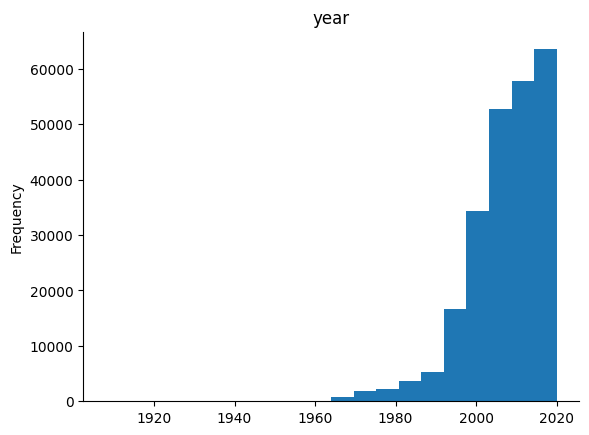

In [70]:
# @title year

from matplotlib import pyplot as plt
rock_artists_df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [71]:
df_jazz = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'jazz']

df_jazz.head()


name              album         artists  year  \
50    Burden Of The Angel/Beast  Dart To The Heart  Bruce Cockburn  1994   
63                       Carbon     Scarlet's Walk       Tori Amos  2002   
65                wampum prayer     Scarlet's Walk       Tori Amos  2002   
66  don't make me come to Vegas     Scarlet's Walk       Tori Amos  2002   
68                   Your Cloud     Scarlet's Walk       Tori Amos  2002   

   predicted_genre  
50            jazz  
63            jazz  
65            jazz  
66            jazz  
68            jazz

In [96]:
df_jazz_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'jazz'].sample(n=10)
df_jazz_sample

name  \
564495  Keyboard Concerto in D Minor, BWV 1052: I. All...   
427539                                   Melodies of 1997   
108294                  The Oragutans And The Small Ducks   
842302                          Feel Like Blowin' My Horn   
291451                        Drunken Blue Rooster - Live   
949443                                 Fine With the Dark   
195301                               Your My Love Of Life   
330069                                        Inner Peace   
443449                                Brittle.Glass.Nerve   
897526                      It Came Upon A Midnight Clear   

                                                    album  \
564495  Bach: Concertos for Piano & Orchestra, BWV 105...   
427539                                 A Delicate Balance   
108294                                    Animals In Love   
842302                 Journeys To The Heart Of The Blues   
291451                                        Todd (live)   
949443                                             Holler   
195301                                Savoring Every Note   
330069                                      In The Moment   
443449                                              Glass   
897526                         Brighter Visions Beam Afar   

                                                  artists  year  \
564495  Johann Sebastian Bach, Pavel Jegorov, Orchestr...  1994   
427539                                       Kenny Werner  1997   
108294                                       Philip Glass  2008   
842302         Joe Louis Walker, Bruce Katz, Giles Robson  2018   
291451                                      Todd Rundgren  2012   
949443                                            Amy Ray  2018   
195301                                       Jimmy Amadie  1997   
330069          David Michael & Christopher Of The Wolves  2005   
443449                                      Jon Moncrieff  2015   
897526                                          Don Peris  2007   

       predicted_genre  
564495            jazz  
427539            jazz  
108294            jazz  
842302            jazz  
291451            jazz  
949443            jazz  
195301            jazz  
330069            jazz  
443449            jazz  
897526            jazz

In [72]:
df_electronic = df_final_genre_predictions.loc[df_final_genre_predictions['predicted_genre'] == 'electronic']

df_electronic.head()

name           album       artists  year  \
45                  Out Of My Mind   Fridays Child    Will Young  2003   
75                        Virginia  Scarlet's Walk     Tori Amos  2002   
102                          Swing   Waste Of Mind     zebrahead  1998   
107             Bootylicious Vinyl   Waste Of Mind     zebrahead  1998   
110  To The Teeth (Shootout Remix)       Swing Set  Ani DiFranco  2000   

    predicted_genre  
45       electronic  
75       electronic  
102      electronic  
107      electronic  
110      electronic

In [99]:
df_electronic_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'electronic'].sample(n=10)
df_electronic_sample

name  \
418045                    Curti Bo Feeling   
365213            Learn to Love Loneliness   
851017               The Lump In My Throat   
2324                      Made in Malaysia   
1015682                       Dot The Eyes   
143510                     Second Snowfall   
319057         Alice In Blunderland - Live   
736648                     Good to Be Home   
43544    Nostalgie Amoureuse - Bootleg Mix   
659872                       The Rain Song   

                                                     album  \
418045                                       Hotel Chill 6   
365213                                              Routes   
851017                                     As Time Goes By   
2324                                       Psychic Psummer   
1015682                                       Newtonfusion   
143510                                              Winter   
319057           The Nan True's Hole Tapes Volume 2 (Live)   
736648                     Lemon Freddy Phantom of the Sky   
43544    Ancestry in Progress - Disc 1 / Zap Mama Disc - 2   
659872                      The Storyteller (Kora & Drums)   

                                                   artists  year  \
418045                                             Mr. Tea  2013   
365213                                           KiloWatts  2006   
851017                                             Falaise  2016   
2324                                                  Cave  2009   
1015682                                         Tom Newton  2004   
143510                                           Dan Black  2005   
319057                  Captain Beefheart & His Magic Band  2011   
736648                                          The Arcana  2017   
43544    Zap Mama, Erykah Badu, Talib Kweli, Common, ?u...  2004   
659872                                          Buku Broux  2017   

        predicted_genre  
418045       electronic  
365213       electronic  
851017       electronic  
2324         electronic  
1015682      electronic  
143510       electronic  
319057       electronic  
736648       electronic  
43544        electronic  
659872       electronic

In [73]:
df_blues = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'blues']

df_blues.head()

name              album         artists  year  \
46              Friday's Child      Fridays Child      Will Young  2003   
47        Listen For The Laugh  Dart To The Heart  Bruce Cockburn  1994   
48     All The Ways I Want You  Dart To The Heart  Bruce Cockburn  1994   
49              Bone In My Ear  Dart To The Heart  Bruce Cockburn  1994   
56  Sunrise On The Mississippi  Dart To The Heart  Bruce Cockburn  1994   

   predicted_genre  
46           blues  
47           blues  
48           blues  
49           blues  
56           blues

In [100]:
df_blues_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'blues'].sample(n=10)
df_blues_sample


name  \
486890                                         La Mentira   
947236                          The Water Boiling Machine   
679315                               Reverend Girl - Live   
603715                                    South Australia   
884327         www.blackmarketrec.com - Chopped & Screwed   
418461  The Creation, Hob. XXI:2: Part I, No.10: Stimm...   
956793  Mr. Tambourine Man - Live with The Band, Isle ...   
472114                                        86 The Mayo   
133152                   Automatic Writing By The Moon #3   
597119                            Heart of the Heartaches   

                                                    album  \
486890                                          Escándalo   
947236                                             Fàrsan   
679315                         Villains - Live & Acoustic   
603715                                                CCD   
884327  The Best of Black Market Records (Chopped & Sc...   
418461              Haydn: Schöpfung (Die) (The Creation)   
956793  Another Self Portrait (1969-1971): The Bootleg...   
472114                         Alive at the Ladybug House   
133152                                  Automatic Writing   
597119                                     Into the River   

                                                  artists  year  \
486890                                     Armando Garzón  1999   
947236                                             Fàrsan  2018   
679315                                     The Verve Pipe  2017   
603715                                      Roger McGuinn  2011   
884327                                            Cedsing  2017   
418461  Franz Joseph Haydn, Sunhae Im, Jan Kobow, Hann...  2005   
956793                                          Bob Dylan  2013   
472114                                       Vic Ruggiero  2006   
133152                                Steven Wray Lobdell  2005   
597119                                        The Minders  2016   

       predicted_genre  
486890           blues  
947236           blues  
679315           blues  
603715           blues  
884327           blues  
418461           blues  
956793           blues  
472114           blues  
133152           blues  
597119           blues

In [74]:
df_hiphop = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'hiphop']

df_hiphop.head()

name                      album                   artists  \
3             Mic Check  The Battle Of Los Angeles  Rage Against The Machine   
14  Take the Power Back   Rage Against The Machine  Rage Against The Machine   
37            Your Game              Fridays Child                Will Young   
42            Very Kind              Fridays Child                Will Young   
77          Rosaryville                Rosaryville             Kate Campbell   

    year predicted_genre  
3   1999          hiphop  
14  1992          hiphop  
37  2003          hiphop  
42  2003          hiphop  
77  1999          hiphop

In [101]:
df_hiphop_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'hiphop'].sample(n=10)

df_hiphop_sample

name  \
1074551  Rolling In the Deep (The Aretha Version) - Mar...   
907484                                      Lucifer Effect   
646931                                               Bossy   
525842                                         Shut de Do'   
5126     Heartbreak Hotel (feat. Faith Evans & Kelly Pr...   
614913                                            Verbatim   
882900                                  We Want Some P--sy   
238406   Let's Think About Where We're Going (feat. The...   
471013                                   Ain't New To This   
33482                                         Ulster Cycle   

                                                     album  \
1074551  Aretha Franklin Sings the Great Diva Classics:...   
907484                                             Haywire   
646931                                     Collective Hits   
525842                                      Together Live!   
5126                                  My Love Is Your Love   
614913                                            Touch Up   
882900                                     Live In Concert   
238406                                      The Sun Legend   
471013                                        Macknificent   
33482                               No Thanks, Yes Please!   

                                                   artists  year  \
1074551                      Aretha Franklin, Mario Winans  2015   
907484                                      Hopsin, SwizZz  2012   
646931                                             Cowboy5  2017   
525842                        Randy Stonehill, Phil Keaggy  2005   
5126             Whitney Houston, Faith Evans, Kelly Price  1998   
614913                                       Mother Mother  2007   
882900                                         2 LIVE CREW  1990   
238406   Rayburn Anthony, The San Antonio Playboys, Cin...  2011   
471013                                 M.C. Mack, Scan Man  2003   
33482                                        Scorpion Jack  2011   

        predicted_genre  
1074551          hiphop  
907484           hiphop  
646931           hiphop  
525842           hiphop  
5126             hiphop  
614913           hiphop  
882900           hiphop  
238406           hiphop  
471013           hiphop  
33482            hiphop

In [75]:
df_reggae = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'reggae']

df_reggae.head()

name           album                  artists  year  \
31   Breath of Your Life  Do It for Love  Daryl Hall & John Oates  2018   
33       Heartbreak Time  Do It for Love  Daryl Hall & John Oates  2018   
38              Stronger   Fridays Child               Will Young  2003   
43                  Free   Fridays Child               Will Young  2003   
113            Hurricane       Swing Set             Ani DiFranco  2000   

    predicted_genre  
31           reggae  
33           reggae  
38           reggae  
43           reggae  
113          reggae

In [104]:
df_reggae_sample = df_final_genre_predictions[df_final_genre_predictions['predicted_genre'] == 'reggae'].sample(n=10)
df_reggae_sample

name  \
852019                                  Hallelujah Anyway   
182559              Let It Snoki Doki Panic (Bonus Track)   
781586                                         Revolución   
654750                       I Am The Light Of This World   
763232                                          Uzilingus   
474075   Alright, Ok, You Win / Everyday I Have the Blues   
1088064                                          Platonic   
620911                          Volveré Con Mis Canciones   
499726                                     Santa Eulallia   
738777                         Zagales Pastores - En Vivo   

                                                     album  \
852019                                   Hallelujah Anyway   
182559                                         8-Bit Jesus   
781586                                      Mucho Mas Alla   
654750                      How I Spent My Summer Vacation   
763232                                          P.o.d.e.r.   
474075                            Live at the 9:20 Special   
1088064                                     Your Dreamland   
620911   Los Hermanos Rincón Interpretan la Música de L...   
499726   El Son Folklore de Guatemala Vol. 2. Música de...   
738777                       La Navidad Mexicana (En Vivo)   

                            artists  year predicted_genre  
852019                 Candi Staton  2018          reggae  
182559               Doctor Octoroc  2008          reggae  
781586                 Leon De Juda  2004          reggae  
654750                Sterling Koch  2005          reggae  
763232   Jefe de la M, Gordo Master  2011          reggae  
474075             Barbara Morrison  2002          reggae  
1088064                 4s4ki, gu^2  2020          reggae  
620911          Los Hermanos Rincon  2001          reggae  
499726      Internacionales Conejos  2015          reggae  
738777                 Óscar Chávez  1990          reggae

In [76]:
# Convertimos predicted_genres: array de NumPy a dataframe
predicted_genres_series = pd.Series(predicted_genres)

# conteo de predicciones para cada género
predictions_count = predicted_genres_series.map(genre_mapping).value_counts()

predictions_count

rock          239063
classical     193641
electronic    172275
blues         145892
jazz          136770
pop           101853
hiphop         69638
reggae         44049
dtype: int64

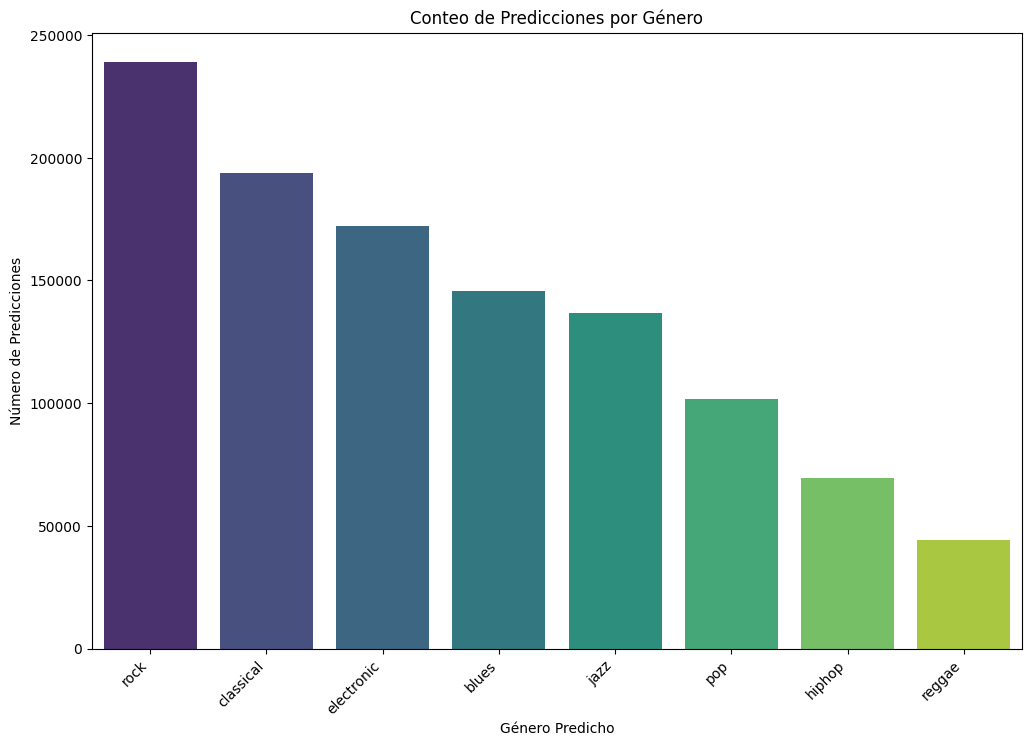

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x=predictions_count.index, y=predictions_count.values, palette='viridis')
plt.title('Conteo de Predicciones por Género')
plt.xlabel('Género Predicho')
plt.ylabel('Número de Predicciones')
plt.xticks(rotation=45, ha='right')
plt.show()

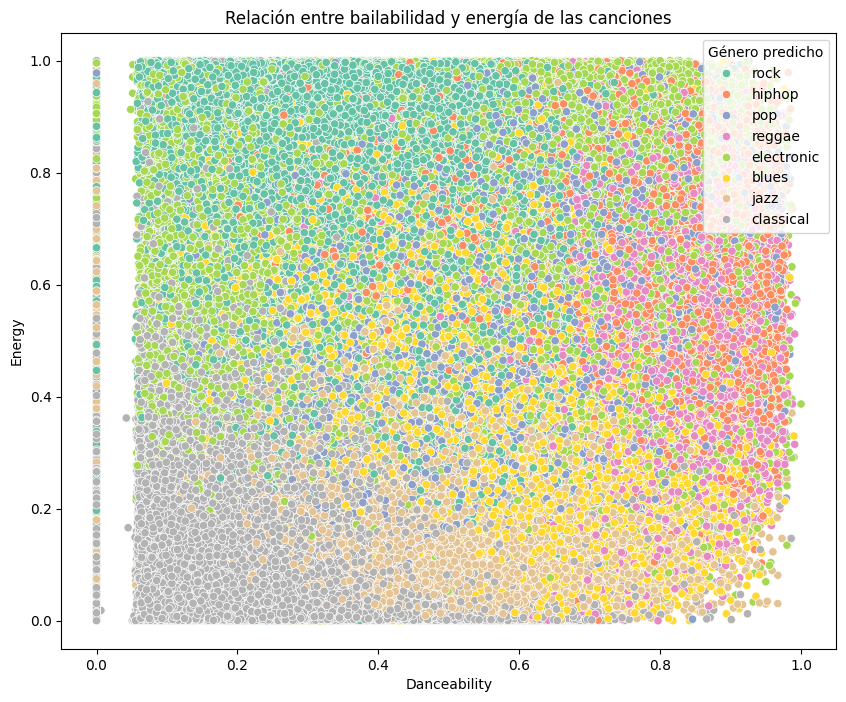

In [78]:
# Invertimos las predicciones a las etiquetas originales
predicted_labels_original = le.inverse_transform(df_predictions_final["predicted_genre"])

# Creamos gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_predictions_final, x="danceability", y="energy", hue=predicted_labels_original, palette="Set2")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Relación entre bailabilidad y energía de las canciones")
plt.legend(title="Género predicho", loc="upper right")
plt.show();

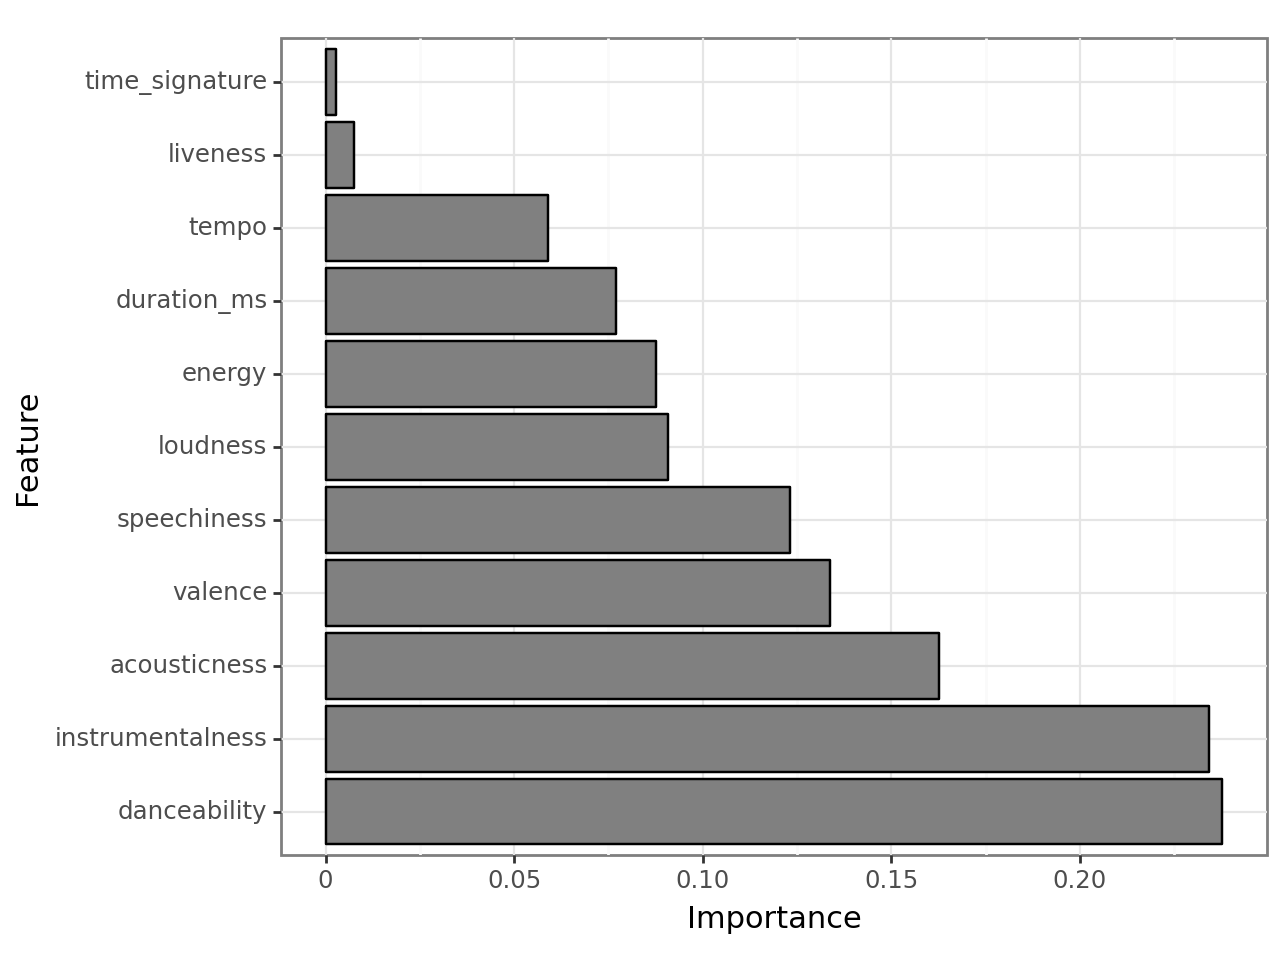

<Figure Size: (640 x 480)>

In [79]:
# Calcular la importancia de las características por permutación
result = permutation_importance(
    rf_clf, X, y, n_repeats=10, random_state=42, n_jobs=2
)

# Crear un dataframe con los resultados
feature_names = X.columns
importances = result.importances_mean
std = result.importances_std
df_importances = pd.DataFrame(
    {"feature": feature_names, "importance": importances, "std": std}
)

# Ordenar el dataframe por importancia decreciente
df_importances = df_importances.sort_values(by="importance", ascending=False)

# Convertir la característica en un factor ordenado
df_importances["feature"] = pd.Categorical(
    df_importances["feature"], categories=df_importances["feature"], ordered=True
)

# Hacer una gráfica de barras con ggplot2
(ggplot(df_importances, aes(x="feature", y="importance")) +
 geom_col(fill="grey", color="black") +
 coord_flip() +
 labs(x="Feature", y="Importance") +
 theme_bw())

array([<Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>, <Axes: xlabel='genre'>,
       <Axes: xlabel='genre'>], dtype=object)

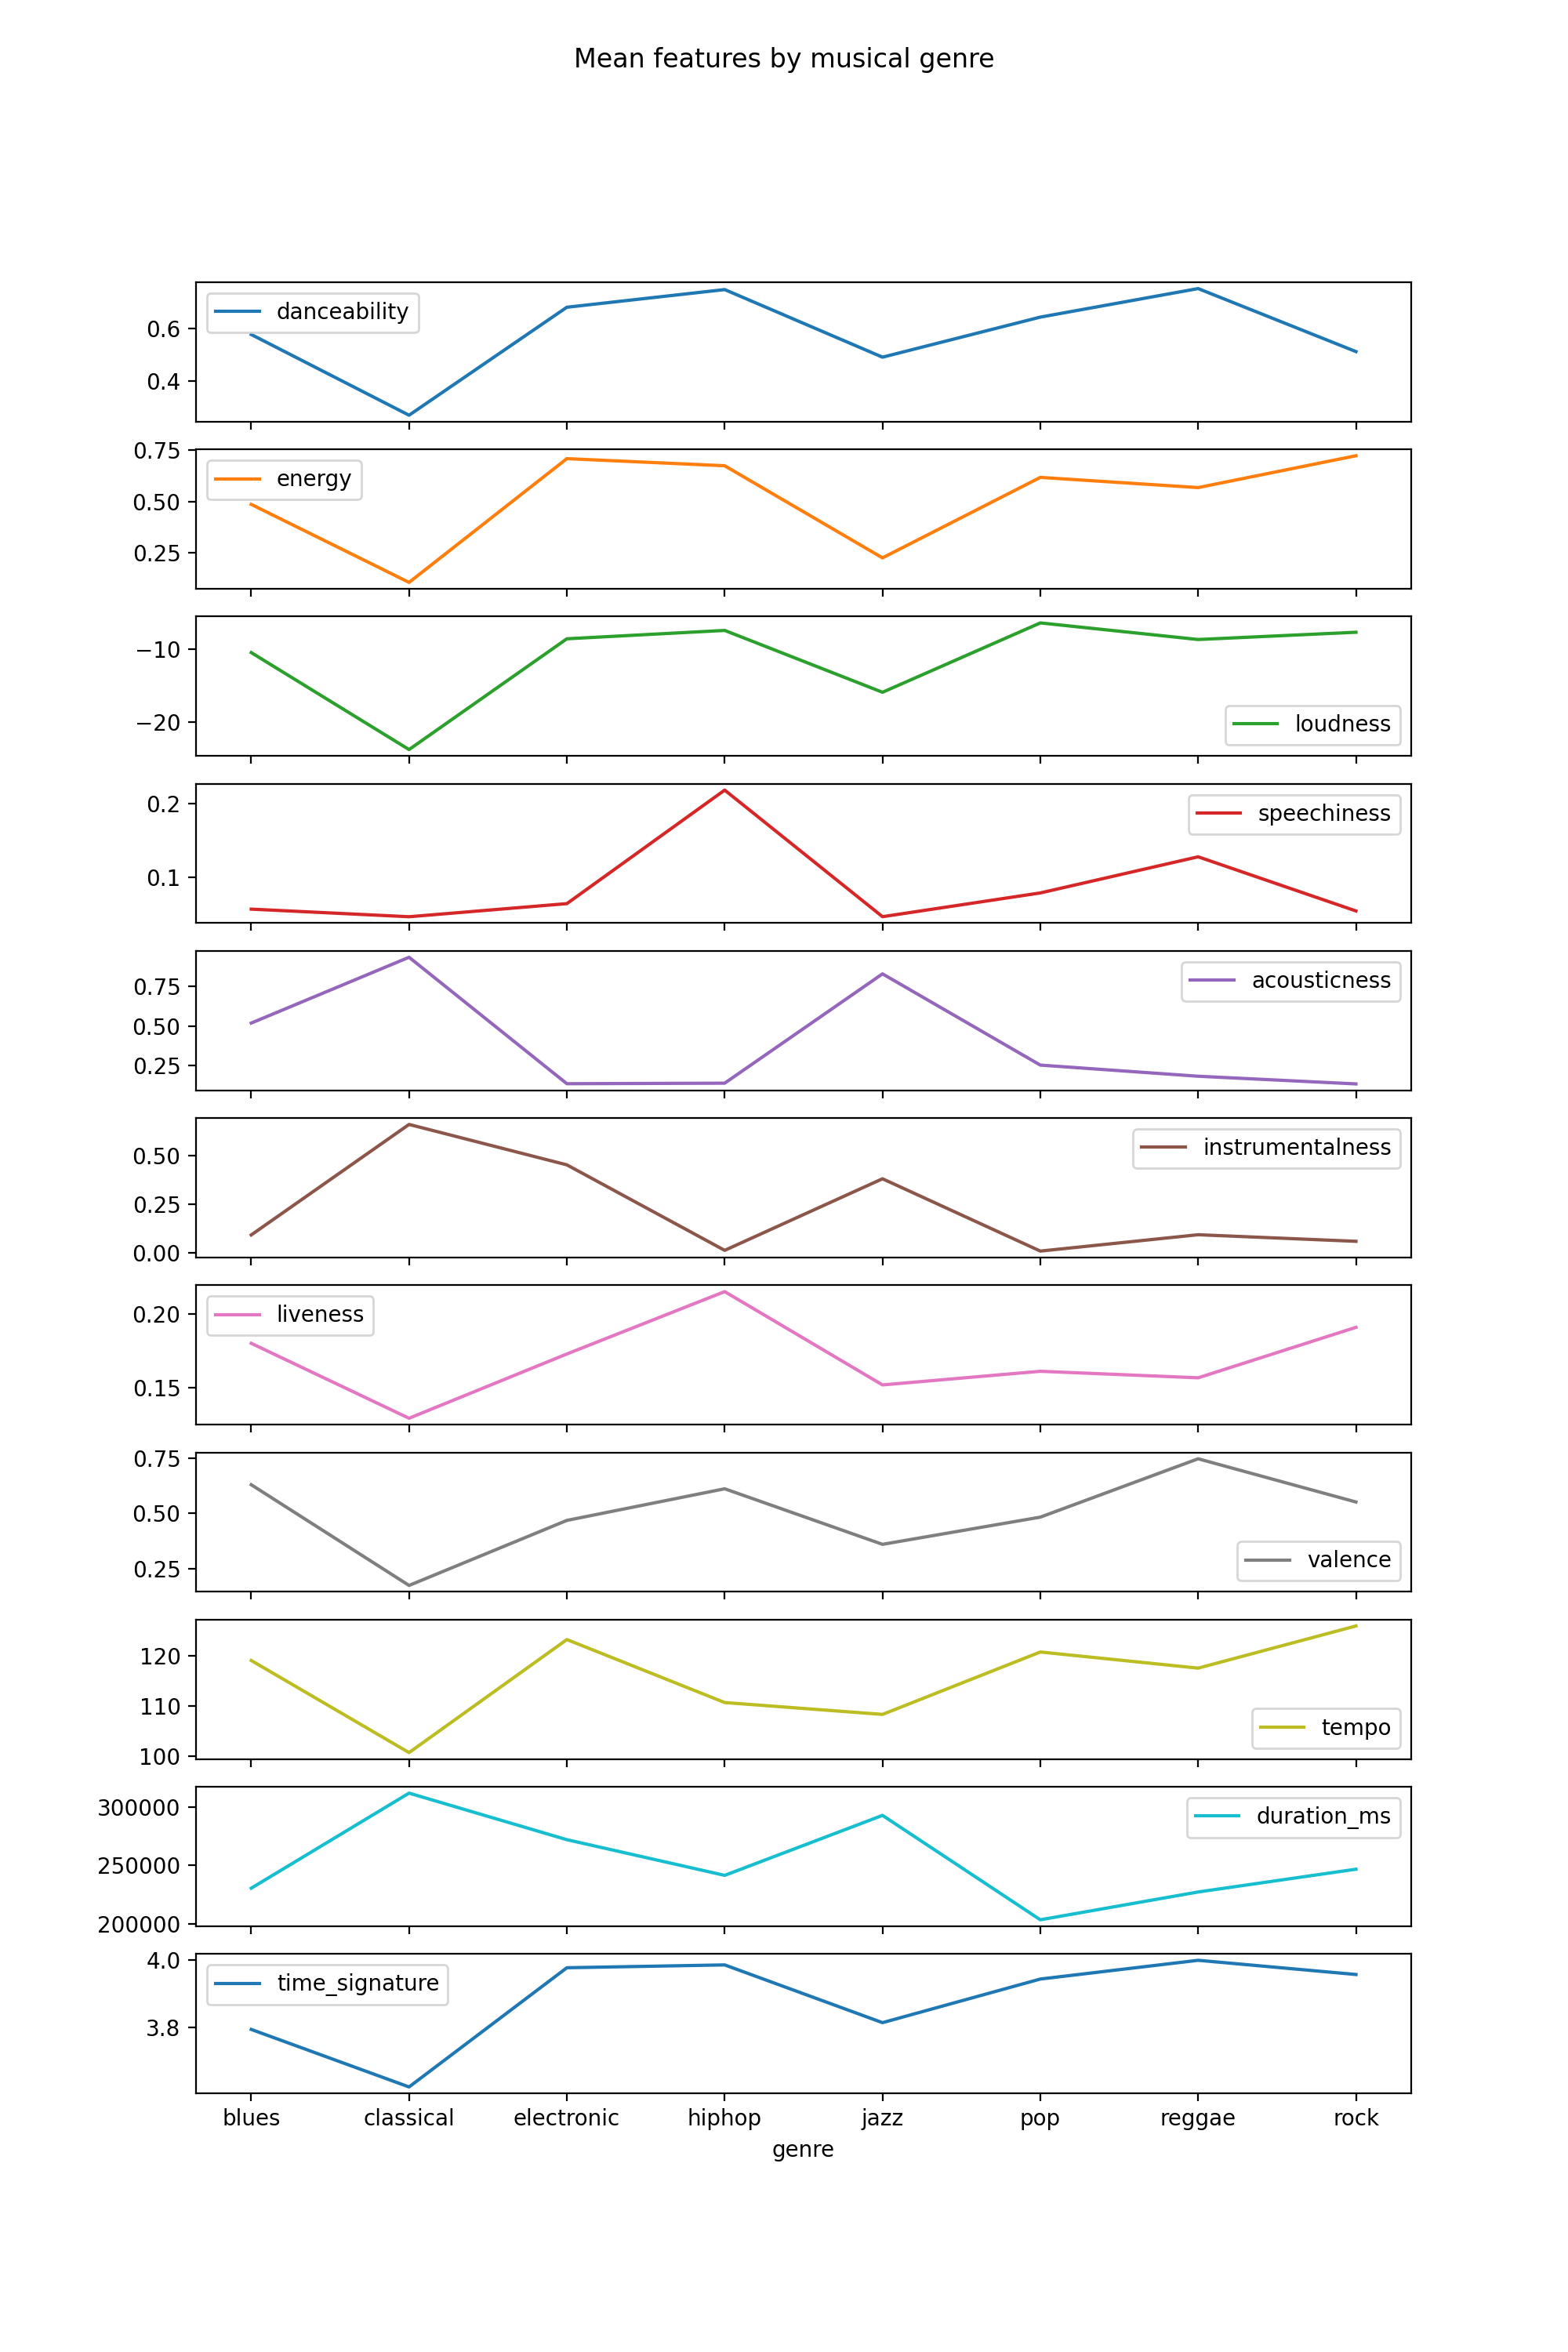

In [80]:
# FEATURES POR GENERO - PRIMER DATASET (TRAIN TEST)

# Agrupar el dataframe por la columna genre y calcular la media de las demás columnas
df_mean_by_genre = df_features.groupby("genre").mean()

# Hacer una gráfica de líneas con el dataframe df_mean_by_genre
df_mean_by_genre.plot(subplots=True, figsize=(10, 15), title="Mean features by musical genre")

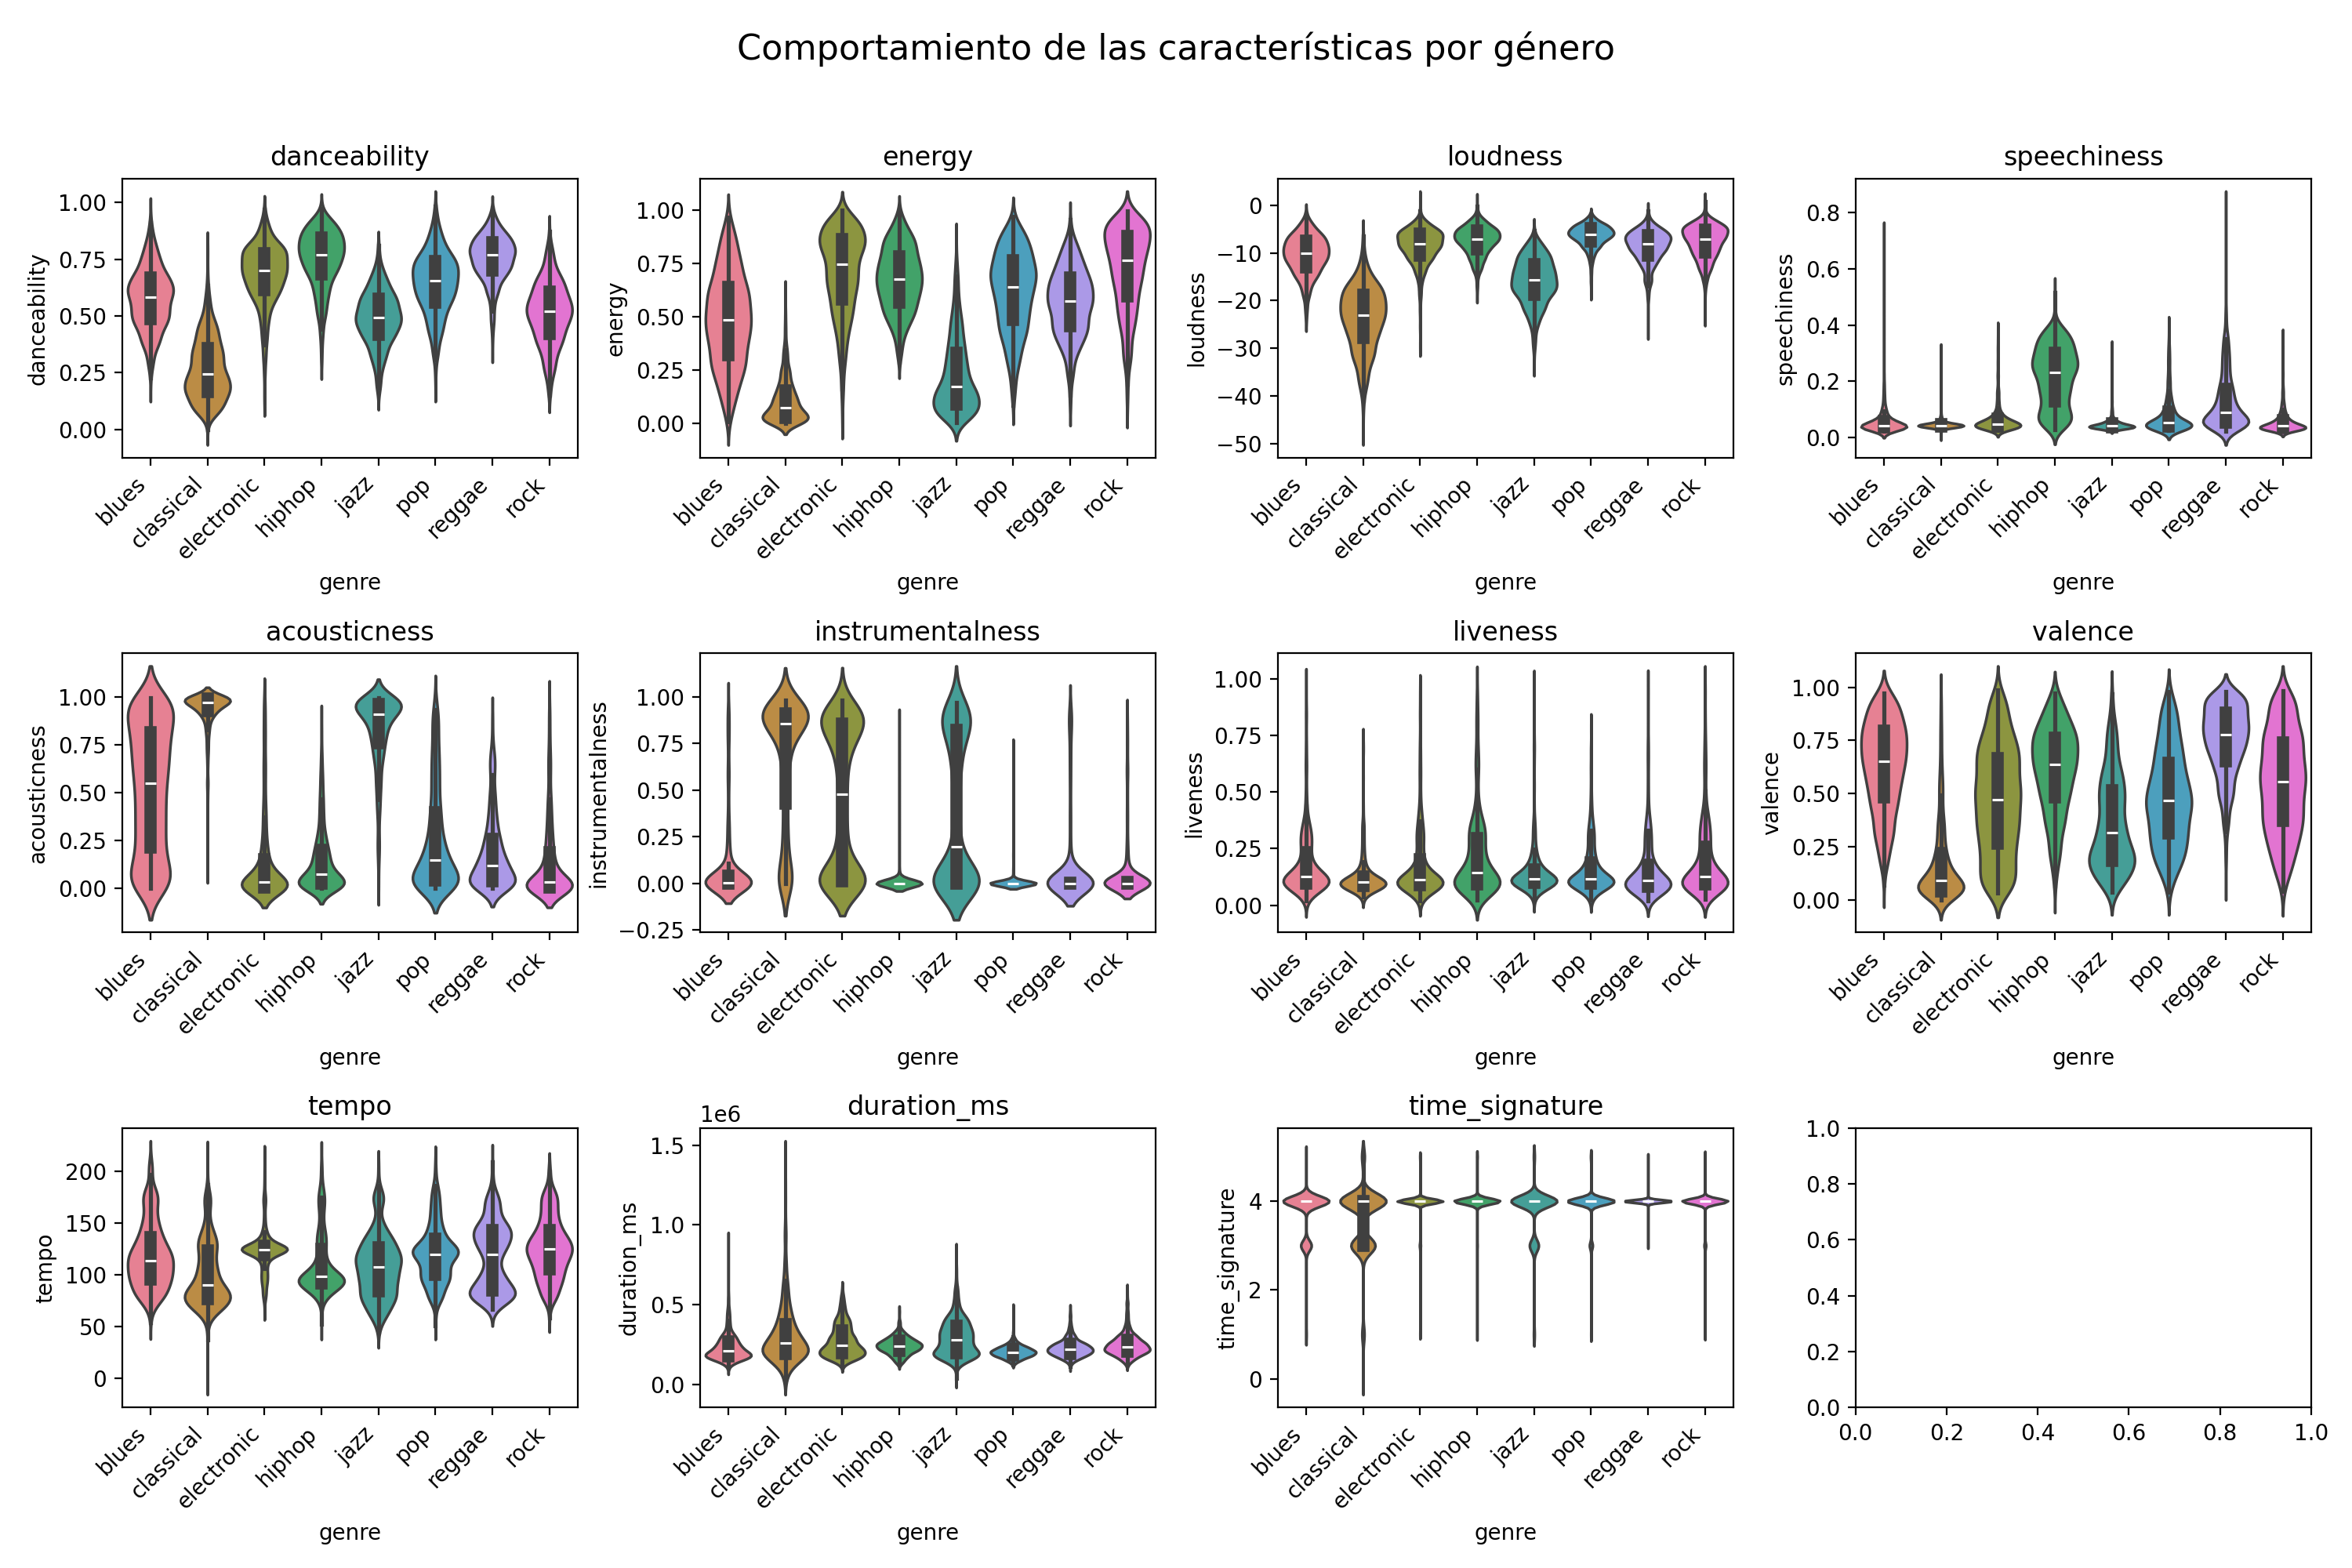

In [81]:
# Crear subplots para cada característica
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Comportamiento de las características por género', fontsize=16)

# Características a graficar
features = df_features.columns[:-1]  # Excluir la columna 'genre'

# Colores para cada género
colors = sns.color_palette("husl", n_colors=len(df_features['genre'].unique()))

# Iterar sobre cada característica y dibujar un gráfico para cada una
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4

    # Crear un gráfico de violín para la característica actual
    sns.violinplot(x='genre', y=feature, data=df_features, ax=axes[row, col], palette=colors)
    axes[row, col].set_title(feature)

    # Rotar las etiquetas del eje x para hacerlas más legibles
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

# Ajustar el diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar el gráfico
plt.show()

**BUSCADORES DE CANCIONES Y ARTISTAS:**

Tras conseguir aplicar nuestro modelo de clasificación, podemos definir funciones para buscar una canción y obtener su género, o para buscar un grupo/artista y que nos diga también a qué género pertenece.

BUSCADOR POR CANCION: El código nos pide introducir el título de una canción, y nos devolverá, si existe en nuestra base de datos, lo siguiente:

Nombre del artista

Género

Título del álbum

Año de publicación

Si existen diversos artistas (o álbumes) para un mismo título de canción, obtendremos una lista de todos ellos.

In [113]:
def obtener_info_cancion(dataframe, nombre_cancion):
    # Filtrar el DataFrame para encontrar exactamente la canción y obtener su información
    resultados = dataframe[dataframe['name'].str.lower() == nombre_cancion.lower()].drop_duplicates(subset=['name', 'artists', 'album', 'year'])

    # Verificar si se encontró información y mostrar el resultado
    if not resultados.empty:
        for index, row in resultados.iterrows():
            genero = row['predicted_genre']
            artista = row['artists']
            cancion = row['name']
            album = row['album']
            año = row['year']

            print(f"Información para la canción '{cancion}':")
            print(f"  Artista: {artista}")
            print(f"  Género: {genero}")
            print(f"  Álbum: {album}")
            print(f"  Año: {año}")
    else:
        print(f"No se encontró información para la canción '{nombre_cancion}'.")

# Ejemplo de uso
nombre_cancion = input("Introduce el nombre exacto de la canción: ")
obtener_info_cancion(df_final_genre_predictions, nombre_cancion)


Introduce el nombre exacto de la canción: smoke on the water
Información para la canción 'Smoke on the Water':
  Artista: "Pickin On Series", Cornbread Red
  Género: electronic
  Álbum: Bluegrass Tribute to Classic Rock
  Año: 2007
Información para la canción 'Smoke on the Water':
  Artista: The Hit Crew
  Género: rock
  Álbum: American Horsepower
  Año: 2007
Información para la canción 'Smoke on the Water':
  Artista: Camille and Kennerly
  Género: electronic
  Álbum: Harp Attack (Remastered)
  Año: 2016
Información para la canción 'Smoke On The Water':
  Artista: Richie Zellon
  Género: blues
  Álbum: Metal Caribe
  Año: 1998
Información para la canción 'Smoke On The Water':
  Artista: Joe Lynn Turner
  Género: rock
  Álbum: Voices Of Classic Rock Vol. 1
  Año: 2018
Información para la canción 'Smoke On the Water':
  Artista: Cocoa Blue
  Género: rock
  Álbum: You'll Play It and Like It!
  Año: 2012
Información para la canción 'Smoke On The Water':
  Artista: Panzerballett
  Género: 

BUSCADOR POR ARTISTA: El código nos pide introducir el nombre de un artista, y nos devolverá, si existe en nuestra base de datos, lo siguiente:

Título de la canción

Género

Título del álbum

Año de publicación

Destacar que obtendremos una lista con todas las canciones (por álbum) del artista en cuestión, que se encuentren en el dataset.

In [115]:
def obtener_info_artista(dataframe, nombre_artista):
    # Filtrar el DataFrame para encontrar todas las canciones del artista y obtener su información
    resultados = dataframe[dataframe['artists'].str.lower() == nombre_artista.lower()].drop_duplicates(subset=['name', 'artists', 'album', 'year'])

    # Verificar si se encontró información y mostrar el resultado
    if not resultados.empty:
        print(f"Información para el artista '{nombre_artista}':")
        for index, row in resultados.iterrows():
            genero = row['predicted_genre']
            artista = row['artists']
            cancion = row['name']
            album = row['album']
            año = row['year']

            print(f"  Canción: {cancion}")
            print(f"    Género: {genero}")
            print(f"    Álbum: {album}")
            print(f"    Año: {año}")
    else:
        print(f"No se encontró información para el artista '{nombre_artista}'.")

# Ejemplo de uso
nombre_artista = input("Introduce el nombre del artista: ")
obtener_info_artista(df_final_genre_predictions, nombre_artista)


Introduce el nombre del artista: metallica
Información para el artista 'metallica':
  Canción: Disposable Heroes
    Género: blues
    Álbum: The Bridge School Concerts 25th Anniversary Edition
    Año: 2011
  Canción: Creeping Death
    Género: rock
    Álbum: Woodstock '99
    Año: 1999
  Canción: Iron Man
    Género: rock
    Álbum: Rock and Roll Hall of Fame Volume 9: 2006-2007
    Año: 2011
  Canción: Hole In The Sky
    Género: rock
    Álbum: Rock and Roll Hall of Fame Volume 9: 2006-2007
    Año: 2011
  Canción: Hardwired
    Género: rock
    Álbum: Hardwired…To Self-Destruct
    Año: 2016
  Canción: Atlas, Rise!
    Género: rock
    Álbum: Hardwired…To Self-Destruct
    Año: 2016
  Canción: Now That We're Dead
    Género: rock
    Álbum: Hardwired…To Self-Destruct
    Año: 2016
  Canción: Moth Into Flame
    Género: rock
    Álbum: Hardwired…To Self-Destruct
    Año: 2016
  Canción: Dream No More
    Género: rock
    Álbum: Hardwired…To Self-Destruct
    Año: 2016
  Canción: H